<a href="https://colab.research.google.com/github/Scart-Lead/digitalgrid-meta/blob/main/DataSETUP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#### Functions to extract, clean and feature extract FB ad data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
def load_data(file_name):
    drive.mount("/content/drive")
    data = pd.read_csv(file_name)
    data = pd.DataFrame(data)
    return data

def data_overview(data):
    """Display data dimensions and the first few rows."""
    print("Data Dimensions:", data.shape)
    print("First few rows:")
    print(data.head())

def data_cleaning(data):
    """Check for missing values and data types."""
    print("Missing Values:")
    print(data.isnull().sum())

def data_day(data):
  data["Day"] =pd.to_datetime(data["Day"])
  data['Weekday'] = data['Day'].dt.weekday
  # Define a mapping of numeric values to weekday names
  weekday_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

# Use the map function to apply the mapping to the 'Weekday' column
  data['Weekday'] = data['Weekday'].map(weekday_mapping)
  return data

In [ ]:
# Call-to-Action Landing Page
# Call-to-Action Landing Page
aff_filepath = "//content//drive//My Drive//Data Lake//AffinityalltimeOCT.csv"
df_aff = load_data(aff_filepath)
data_overview(df_aff)
data_cleaning(df_aff)
data_ibiza = data_day(df_aff)

Mounted at /content/drive
Data Dimensions: (1584, 20)
First few rows:
                         Campaign name  \
0       Cold Traffic: UK - Conversions   
1  Cold Traffic: Ireland - Conversions   
2  Cold Traffic: Ireland - Conversions   
3  Cold Traffic: Ireland - Conversions   
4  Cold Traffic: Ireland - Conversions   

                                         Ad Set Name    Age         Day  \
0  18-65: {Audience #2 from Audience Worksheet OP...  25-34  2023-10-24   
1  18-65: {Audience #1 from Audience Worksheet - ...  45-54  2023-10-24   
2  18-65: {Audience #1 from Audience Worksheet - ...  18-24  2023-10-24   
3  18-65: {Audience #1 from Audience Worksheet - ...  55-64  2023-10-24   
4  18-65: {Audience #1 from Audience Worksheet - ...  25-34  2023-10-24   

  Delivery status Delivery level  Reach  Impressions  Frequency Result type  \
0          active          adset     48           59   1.229167         NaN   
1          active          adset    391          431   1.102302     

In [ ]:
# Split into campaigns
ire_aff = df_aff[df_aff["Campaign name"].str.contains("Ireland")]
uk_aff = df_aff[df_aff["Campaign name"].str.contains("UK")]
pol_aff = df_aff[df_aff["Campaign name"].str.contains("Poland")]

In [ ]:

ire_aff.head()

,Campaign name,Ad Set Name,Age,Day,Delivery status,Delivery level,Reach,Impressions,Frequency,Result type,Results,Cost per result,Starts,Ends,Link clicks,Page engagement,CTR (all),Reporting starts,Reporting ends,Weekday
1,Cold Traffic: Ireland - Conversions,18-65: {Audience #1 from Audience Worksheet - ...,45-54,2023-10-24,active,adset,370,406,1.097297,NaN,NaN,NaN,2023-07-25,Ongoing,NaN,NaN,0.738916,2023-10-24,2023-10-24,Tuesday
2,Cold Traffic: Ireland - Conversions,18-65: {Audience #1 from Audience Worksheet - ...,18-24,2023-10-24,active,adset,122,132,1.081967,NaN,NaN,NaN,2023-07-25,Ongoing,NaN,NaN,0.000000,2023-10-24,2023-10-24,Tuesday
3,Cold Traffic: Ireland - Conversions,18-65: {Audience #1 from Audience Worksheet - ...,35-44,2023-10-24,active,adset,373,454,1.217158,NaN,NaN,NaN,2023-07-25,Ongoing,2.0,2.0,0.440529,2023-10-24,2023-10-24,Tuesday
4,Cold Traffic: Ireland - Conversions,18-65: {Audience #1 from Audience Worksheet - ...,25-34,2023-10-24,active,adset,333,364,1.093093,NaN,NaN,NaN,2023-07-25,Ongoing,1.0,1.0,0.274725,2023-10-24,2023-10-24,Tuesday
5,Cold Traffic: Ireland - Conversions,18-65: {Audience #1 from Audience Worksheet - ...,65+,2023-10-24,active,adset,162,187,1.154321,NaN,NaN,NaN,2023-07-25,Ongoing,4.0,4.0,3.743316,2023-10-24,2023-10-24,Tuesday


In [ ]:
# Call-to-Action Landing Page
ibiza_filepath = "//content//drive//My Drive//Data Lake//ZAN_141123.csv"
data_ibiza = load_data(ibiza_filepath)
data_overview(data_ibiza)
data_cleaning(data_ibiza)
data_ibiza = data_day(data_ibiza)

Mounted at /content/drive
Data Dimensions: (282, 21)
First few rows:
               Campaign name  \
0  Cold Traffic: Netherlands   
1  Cold Traffic: Netherlands   
2  Cold Traffic: Netherlands   
3  Cold Traffic: Netherlands   
4  Cold Traffic: Netherlands   

                                         Ad Set Name    Age         Day  \
0  18-65: {Audience #1 from Audience Worksheet}: ...    65+  2023-11-12   
1  18-65: {Audience #1 from Audience Worksheet}: ...    65+  2023-10-27   
2  18-65: {Audience #1 from Audience Worksheet}: ...    65+  2023-10-22   
3  18-65: {Audience #1 from Audience Worksheet}: ...    65+  2023-11-13   
4  18-65: {Audience #1 from Audience Worksheet}: ...  18-24  2023-11-04   

  Delivery status Delivery level  Reach  Impressions  Frequency  \
0          active          adset     51           58   1.137255   
1          active          adset     94          107   1.138298   
2          active          adset     93          124   1.333333   
3          active  

In [ ]:
# Call to Action - Facebook Form
soto_filepath ="//content//drive//My Drive//Data Lake//TPA.csv"
df_soto = load_data(soto_filepath)
data_overview(df_soto)
data_cleaning(df_soto)
df_soto = data_day(df_soto)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data Dimensions: (653, 25)
First few rows:
                       Campaign name  \
0  Cold Traffic: Lead Forms - Sweden   
1  Cold Traffic: Lead Forms - Sweden   
2  Cold Traffic: Lead Forms - Sweden   
3  Cold Traffic: Lead Forms - Sweden   
4  Cold Traffic: Lead Forms - Sweden   

                                         Ad Set Name    Age   Gender  \
0  18-65: {Audience #1 from Audience Worksheet}: ...  18-24     male   
1  18-65: {Audience #1 from Audience Worksheet}: ...  25-34     male   
2  18-65: {Audience #1 from Audience Worksheet}: ...  18-24  unknown   
3  18-65: {Audience #1 from Audience Worksheet}: ...  45-54  unknown   
4  18-65: {Audience #1 from Audience Worksheet}: ...  55-64  unknown   

          Day Delivery status Delivery level  Reach  Impressions  Frequency  \
0  2023-10-19          active          adset     32           32   1.000000

,Campaign name,Ad Set Name,Age,Gender,Day,Delivery status,Delivery level,Reach,Impressions,Frequency,...,Ends,CPC (cost per link click),CTR (all),Link clicks,Post comments,Post engagements,Post reactions,Reporting starts,Reporting ends,Weekday
0,Cold Traffic: Lead Forms - Sweden,18-65: {Audience #1 from Audience Worksheet}: ...,18-24,male,2023-10-19,active,adset,32,32,1.000000,...,Ongoing,NaN,0.000000,NaN,NaN,NaN,NaN,2023-10-19,2023-10-19,Thursday
1,Cold Traffic: Lead Forms - Sweden,18-65: {Audience #1 from Audience Worksheet}: ...,25-34,male,2023-10-19,active,adset,38,41,1.078947,...,Ongoing,NaN,0.000000,NaN,NaN,NaN,NaN,2023-10-19,2023-10-19,Thursday
2,Cold Traffic: Lead Forms - Sweden,18-65: {Audience #1 from Audience Worksheet}: ...,18-24,unknown,2023-10-19,active,adset,1,1,1.000000,...,Ongoing,NaN,0.000000,NaN,NaN,NaN,NaN,2023-10-19,2023-10-19,Thursday
3,Cold Traffic: Lead Forms - Sweden,18-65: {Audience #1 from Audience Worksheet}: ...,45-54,unknown,2023-10-19,active,adset,2,2,1.000000,...,Ongoing,NaN,0.000000,NaN,NaN,NaN,NaN,2023-10-19,2023-10-19,Thursday
4,Cold Traffic: Lead Forms - Sweden,18-65: {Audience #1 from Audience Worksheet}: ...,55-64,unknown,2023-10-19,active,adset,4,4,1.000000,...,Ongoing,NaN,0.000000,NaN,NaN,NaN,NaN,2023-10-19,2023-10-19,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,Cold Traffic: Lead Forms - Sweden,18-65: {Audience #1 from Audience Worksheet}: ...,65+,male,2023-09-12,active,adset,68,81,1.191176,...,Ongoing,1.085,3.703704,2.0,NaN,3.0,1.0,2023-09-12,2023-09-12,Tuesday
649,Cold Traffic: Lead Forms - Sweden,18-65: {Audience #1 from Audience Worksheet}: ...,45-54,male,2023-09-12,active,adset,66,79,1.196970,...,Ongoing,1.090,3.797468,1.0,NaN,1.0,NaN,2023-09-12,2023-09-12,Tuesday
650,Cold Traffic: Lead Forms - Sweden,18-65: {Audience #1 from Audience Worksheet}: ...,65+,unknown,2023-09-12,active,adset,4,4,1.000000,...,Ongoing,NaN,0.000000,NaN,NaN,NaN,NaN,2023-09-12,2023-09-12,Tuesday
651,Cold Traffic: Lead Forms - Sweden,18-65: {Audience #1 from Audience Worksheet}: ...,18-24,unknown,2023-09-12,active,adset,3,3,1.000000,...,Ongoing,NaN,0.000000,NaN,NaN,NaN,NaN,2023-09-12,2023-09-12,Tuesday


In [ ]:
total = df_soto["Results"].sum()

In [ ]:
print(total)

10.0


In [ ]:
tene_filepath = "//content//drive//My Drive//Data Lake//TENE.csv"
df_tene = load_data(tene_filepath)
data_overview(df_tene)
data_cleaning(df_tene)
data_day(df_tene)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data Dimensions: (722, 26)
First few rows:
                       Campaign name  \
0  Cold Traffic: Lead Forms - Sweden   
1  Cold Traffic: Lead Forms - Sweden   
2  Cold Traffic: Lead Forms - Sweden   
3  Cold Traffic: Lead Forms - Sweden   
4  Cold Traffic: Lead Forms - Sweden   

                                         Ad Set Name    Age  Gender  \
0  18-65: {Audience #1 from Audience Worksheet}: ...  55-64  female   
1  18-65: {Audience #1 from Audience Worksheet}: ...  25-34    male   
2  18-65: {Audience #1 from Audience Worksheet}: ...  18-24    male   
3  18-65: {Audience #1 from Audience Worksheet}: ...  35-44  female   
4  18-65: {Audience #1 from Audience Worksheet}: ...  18-24  female   

          Day Delivery status Delivery level  Reach  Impressions  Frequency  \
0  2023-10-19          active          adset     44           47   1.068182   
1 

,Campaign name,Ad Set Name,Age,Gender,Day,Delivery status,Delivery level,Reach,Impressions,Frequency,...,Link clicks,CPC (cost per link click),"CPM (cost per 1,000 impressions)",CTR (all),Post comments,Post engagements,Post reactions,Reporting starts,Reporting ends,Weekday
0,Cold Traffic: Lead Forms - Sweden,18-65: {Audience #1 from Audience Worksheet}: ...,55-64,female,2023-10-19,active,adset,44,47,1.068182,...,2.0,0.720789,30.671892,4.255319,NaN,2.0,NaN,2023-10-19,2023-10-19,Thursday
1,Cold Traffic: Lead Forms - Sweden,18-65: {Audience #1 from Audience Worksheet}: ...,25-34,male,2023-10-19,active,adset,37,40,1.081081,...,NaN,NaN,8.509320,0.000000,NaN,NaN,NaN,2023-10-19,2023-10-19,Thursday
2,Cold Traffic: Lead Forms - Sweden,18-65: {Audience #1 from Audience Worksheet}: ...,18-24,male,2023-10-19,active,adset,32,32,1.000000,...,NaN,NaN,5.631168,0.000000,NaN,NaN,NaN,2023-10-19,2023-10-19,Thursday
3,Cold Traffic: Lead Forms - Sweden,18-65: {Audience #1 from Audience Worksheet}: ...,35-44,female,2023-10-19,active,adset,32,35,1.093750,...,NaN,NaN,20.880013,0.000000,NaN,NaN,NaN,2023-10-19,2023-10-19,Thursday
4,Cold Traffic: Lead Forms - Sweden,18-65: {Audience #1 from Audience Worksheet}: ...,18-24,female,2023-10-19,active,adset,13,13,1.000000,...,NaN,NaN,12.321188,0.000000,NaN,NaN,NaN,2023-10-19,2023-10-19,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,Cold Traffic: Lead Forms - Sweden,18-65: {Audience #1 from Audience Worksheet}: ...,55-64,female,2023-09-08,active,adset,57,65,1.140351,...,1.0,1.370000,21.076923,1.538462,NaN,1.0,NaN,2023-09-08,2023-09-08,Friday
718,Cold Traffic: Lead Forms - Sweden,18-65: {Audience #1 from Audience Worksheet}: ...,65+,male,2023-09-08,active,adset,64,72,1.125000,...,1.0,1.740000,24.166667,1.388889,NaN,1.0,NaN,2023-09-08,2023-09-08,Friday
719,Cold Traffic: Lead Forms - Sweden,18-65: {Audience #1 from Audience Worksheet}: ...,45-54,male,2023-09-08,active,adset,82,102,1.243902,...,NaN,NaN,17.745098,0.980392,NaN,NaN,NaN,2023-09-08,2023-09-08,Friday
720,Cold Traffic: Lead Forms - Sweden,18-65: {Audience #1 from Audience Worksheet}: ...,25-34,female,2023-09-08,active,adset,127,153,1.204724,...,2.0,0.735000,9.607843,2.614379,NaN,3.0,1.0,2023-09-08,2023-09-08,Friday


EXPLORATORY DATA ANALYSIS & VIZULISATIONS

In [ ]:

def aggregate_data(df, sum_columns, mean_columns, groupby_column):
    """
    Aggregate data in a DataFrame based on provided columns.

    Args:
        df (pandas.DataFrame): The DataFrame to aggregate.
        sum_columns (list): A list of column names to calculate the sum.
        mean_columns (list): A list of column names to calculate the mean.
        groupby_column (str): The column to group by.

    Returns:
        pandas.DataFrame: The aggregated DataFrame.
    """
    # Create a dictionary to specify aggregation functions for each column
    aggregation = {}

    # Add sum aggregation for sum_columns
    for column in sum_columns:
        aggregation[column] = 'sum'

    # Add mean aggregation for mean_columns
    for column in mean_columns:
        aggregation[column] = 'mean'

    # Group by the specified column and perform the aggregation
    result = df.groupby(groupby_column).agg(aggregation).reset_index()

    custom_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    #result['Weekday'] = pd.Categorical(result['Weekday'], categories=custom_order, ordered=True)
    #result = result.sort_values("Weekday")

    return result


def pivot_dataframe(data, index_col, columns_col, values_col):
    """
    Create a pivot table from a DataFrame.

    Args:
        data (pandas.DataFrame): The input DataFrame.
        index_col (str): The column to use as the index.
        columns_col (str): The column to use as columns in the pivot table.
        values_col (str): The column containing values for the pivot table.

    Returns:
        pandas.DataFrame: The pivot table.
    """
    pivot_table = data.pivot(index=index_col, columns=columns_col, values=values_col)
    return pivot_table

def visualize_age_group_data(data, metric, x_column, y_column, title, legend_title=None, figsize=(24, 12), rotation=0):
    """
    Visualize aggregated data for age groups over a specific dimension (e.g., 'Weekday').

    Args:
        data (pandas.DataFrame): The aggregated data to plot.
        metric (str): The metric to plot (e.g., 'CTR (all)').
        x_column (str): The column to use as the x-axis (e.g., 'Weekday').
        y_column (str): The column to use as the y-axis (e.g., 'Impressions').
        title (str): Title for the plot.
        legend_title (str, optional): Title for the legend (default is None).
        figsize (tuple, optional): Figure size (width, height) (default is (12, 6)).
        rotation (int, optional): Rotation angle for x-axis labels (default is 0 degrees).
    """
    colors = ['#007ACC', '#FF6F61', '#4DB848', '#FFA07A', '#8A2BE2', '#FFD700']
    fig, ax = plt.subplots(figsize=(figsize))
    age_groups = data["Age"].unique()
    ax.set_facecolor('#333333')
    for age_group in age_groups:
        age_group_data = data[data['Age'] == age_group]
        plt.plot(age_group_data[x_column], age_group_data[y_column], label=f'Age Group {age_group}')

    # Customize the plot
    plt.xlabel(x_column, fontsize = 15)
    plt.ylabel(y_column, fontsize = 15)
    plt.title(title, fontsize = 18)
    plt.legend(title = "Age Groups")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # Set gridlines with dashed lines
    ax.grid(axis='y', linestyle='--', alpha=0.7, color='white')
    plt.grid(True)
    plt.xticks(rotation=rotation)
    plt.savefig('professional_plot.png', dpi=300, bbox_inches='tight')
    # Show the plot
    plt.show()

# Example usage:
#group_zan = aggregate_data(data_ibiza, ["Post engagements"], ["CTR (all)", "CPC (cost per link click)"], ["Age", "Weekday"])




In [ ]:
age_group_zan = aggregate_data(data_ibiza, ["Post engagements"],  ["CTR (all)", "CPC (cost per link click)"], ["Age"])

In [ ]:
age_group_zan.head(20)

,Age,Post engagements,CTR (all),CPC (cost per link click)
0,18-24,30.0,0.757159,0.799375
1,25-34,29.0,0.669535,1.350687
2,35-44,81.0,1.102779,1.804280
3,45-54,134.0,1.394880,2.046565
4,55-64,131.0,1.449568,1.819366
5,65+,76.0,2.172290,1.384893


In [ ]:
group_day_zan = aggregate_data(data_ibiza, ["Post engagements"], ["CTR (all)", "CPC (cost per link click)"], ["Weekday"])

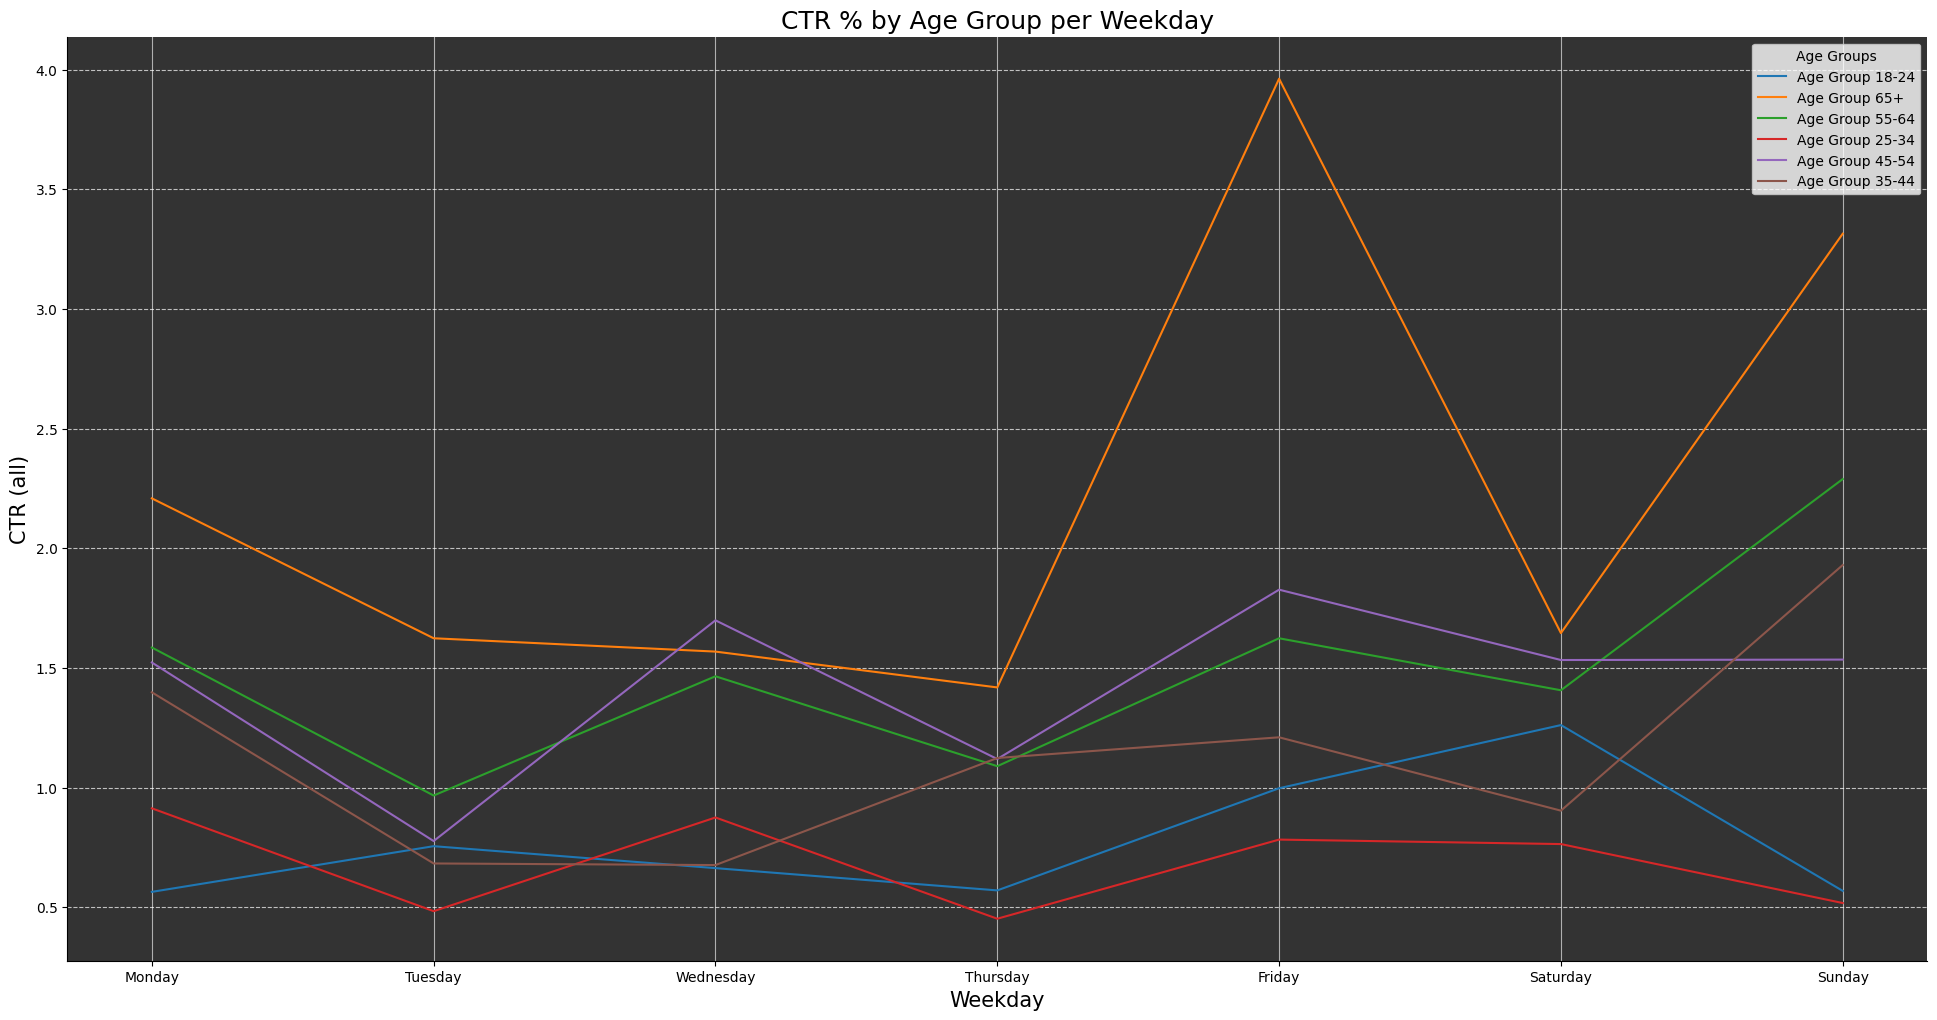

In [ ]:
visualize_age_group_data(group_zan, "CTR (all)", "Weekday", "CTR (all)", "CTR % by Age Group per Weekday")

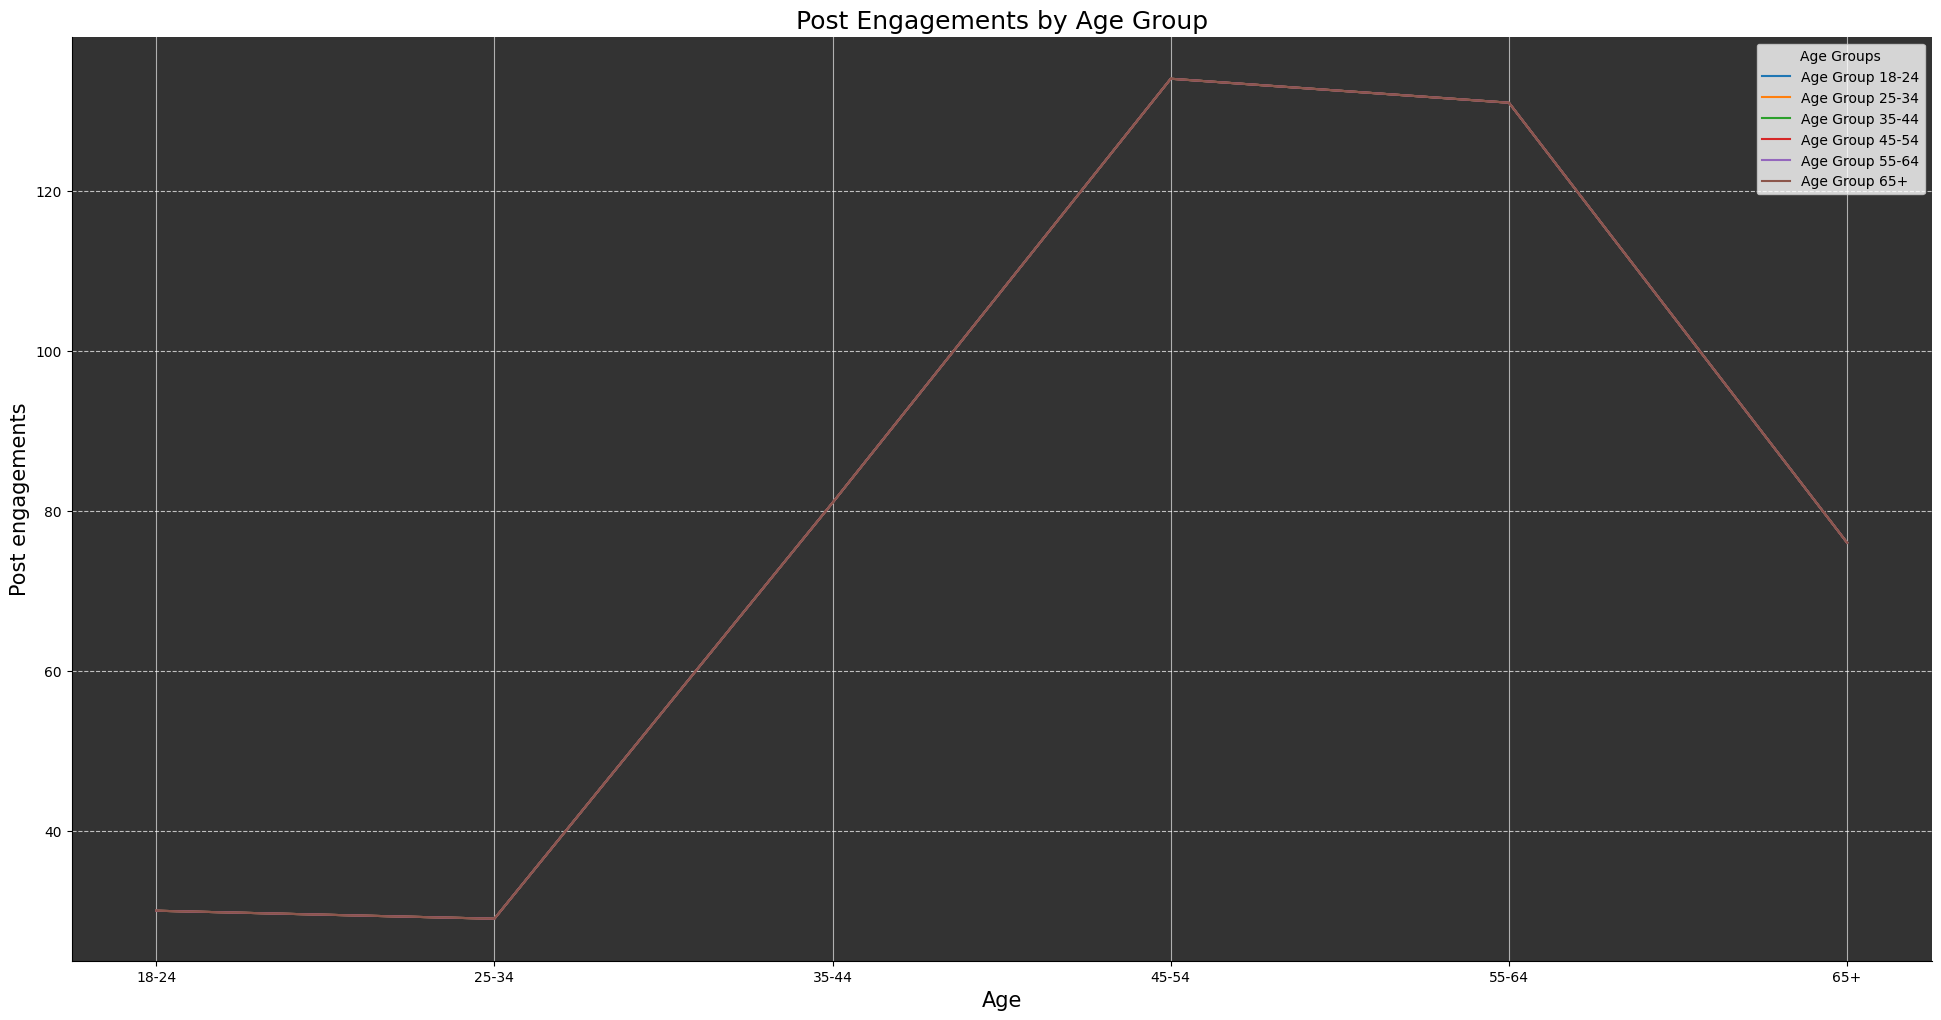

In [ ]:
visualize_age_group_data(age_group_zan, "Post engagements", "Age", "Post engagements", "Post Engagements by Age Group")

In [ ]:
age_group_zan.head()

,Age,Post engagements,CTR (all),CPC (cost per link click)
0,18-24,30.0,0.757159,0.799375
1,25-34,29.0,0.669535,1.350687
2,35-44,81.0,1.102779,1.804280
3,45-54,134.0,1.394880,2.046565
4,55-64,131.0,1.449568,1.819366


In [ ]:
group_zan.head()

,Age,Weekday,Post engagements,CTR (all),CPC (cost per link click)
1,18-24,Monday,2.0,0.564042,0.865000
36,65+,Monday,8.0,2.208488,1.824738
29,55-64,Monday,15.0,1.585188,3.107152
8,25-34,Monday,3.0,0.913235,1.339675
22,45-54,Monday,17.0,1.522631,1.510328


In [ ]:
group_day_zan.head(7)

,Weekday,Post engagements,CTR (all),CPC (cost per link click)
1,Monday,48.0,1.323132,1.736213
5,Tuesday,47.0,0.858613,1.883118
6,Wednesday,72.0,1.157701,1.457736
4,Thursday,57.0,0.962054,1.413700
0,Friday,83.0,1.645542,1.382914
2,Saturday,57.0,1.315365,1.728217
3,Sunday,74.0,1.533819,1.465710


from matplotlib import pyplot as plt
_df_0['Post engagements'].plot(kind='hist', bins=20, title='Post engagements')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['CTR (all)'].plot(kind='hist', bins=20, title='CTR (all)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['CPC (cost per link click)'].plot(kind='hist', bins=20, title='CPC (cost per link click)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Post engagements', y='CTR (all)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='CTR (all)', y='CPC (cost per link click)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['Post engagements'].plot(kind='line', figsize=(8, 4), title='Post engagements')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['CTR (all)'].plot(kind='line', figsize=(8, 4), title='CTR (all)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['CPC (cost per link click)'].plot(kind='line', figsize=(8, 4), title='CPC (cost per link click)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
def visualize_total_cpc_by_weekday(data, x_column, y_column, title, figsize=(24, 12), rotation=0):
    """
    Visualize the total CPC (cost per link click) across age groups for each weekday.

    Args:
        data (pandas.DataFrame): The data to plot.
        x_column (str): The column to use as the x-axis (e.g., 'Weekday').
        y_column (str): The column to use as the y-axis (e.g., 'CPC (cost per link click)').
        title (str): Title for the plot.
        figsize (tuple, optional): Figure size (width, height) (default is (10, 6)).
        rotation (int, optional): Rotation angle for x-axis labels (default is 0 degrees).
    """
    # Group by weekday and sum the CPC values
    total_cpc_by_weekday = data.groupby(x_column)[y_column].mean().reset_index()

    # Plotting
    colors = ['#3B82F6', '#9333EA', '#10B981', '#F59E0B', '#EF4444', '#6B7280']  # Adjust colors as needed
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_facecolor('#333333')

    plt.bar(total_cpc_by_weekday[x_column], total_cpc_by_weekday[y_column], color=colors)

    # Customize the plot
    plt.xlabel(x_column, fontsize=15)
    plt.ylabel(y_column, fontsize=15)
    plt.title(title, fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(axis='y', linestyle='--', alpha=0.7, color='white')
    plt.xticks(rotation=rotation)
    plt.tight_layout()

    # Save and show the plot
    plt.savefig('total_cpc_by_weekday.png', dpi=300, bbox_inches='tight')
    plt.show()



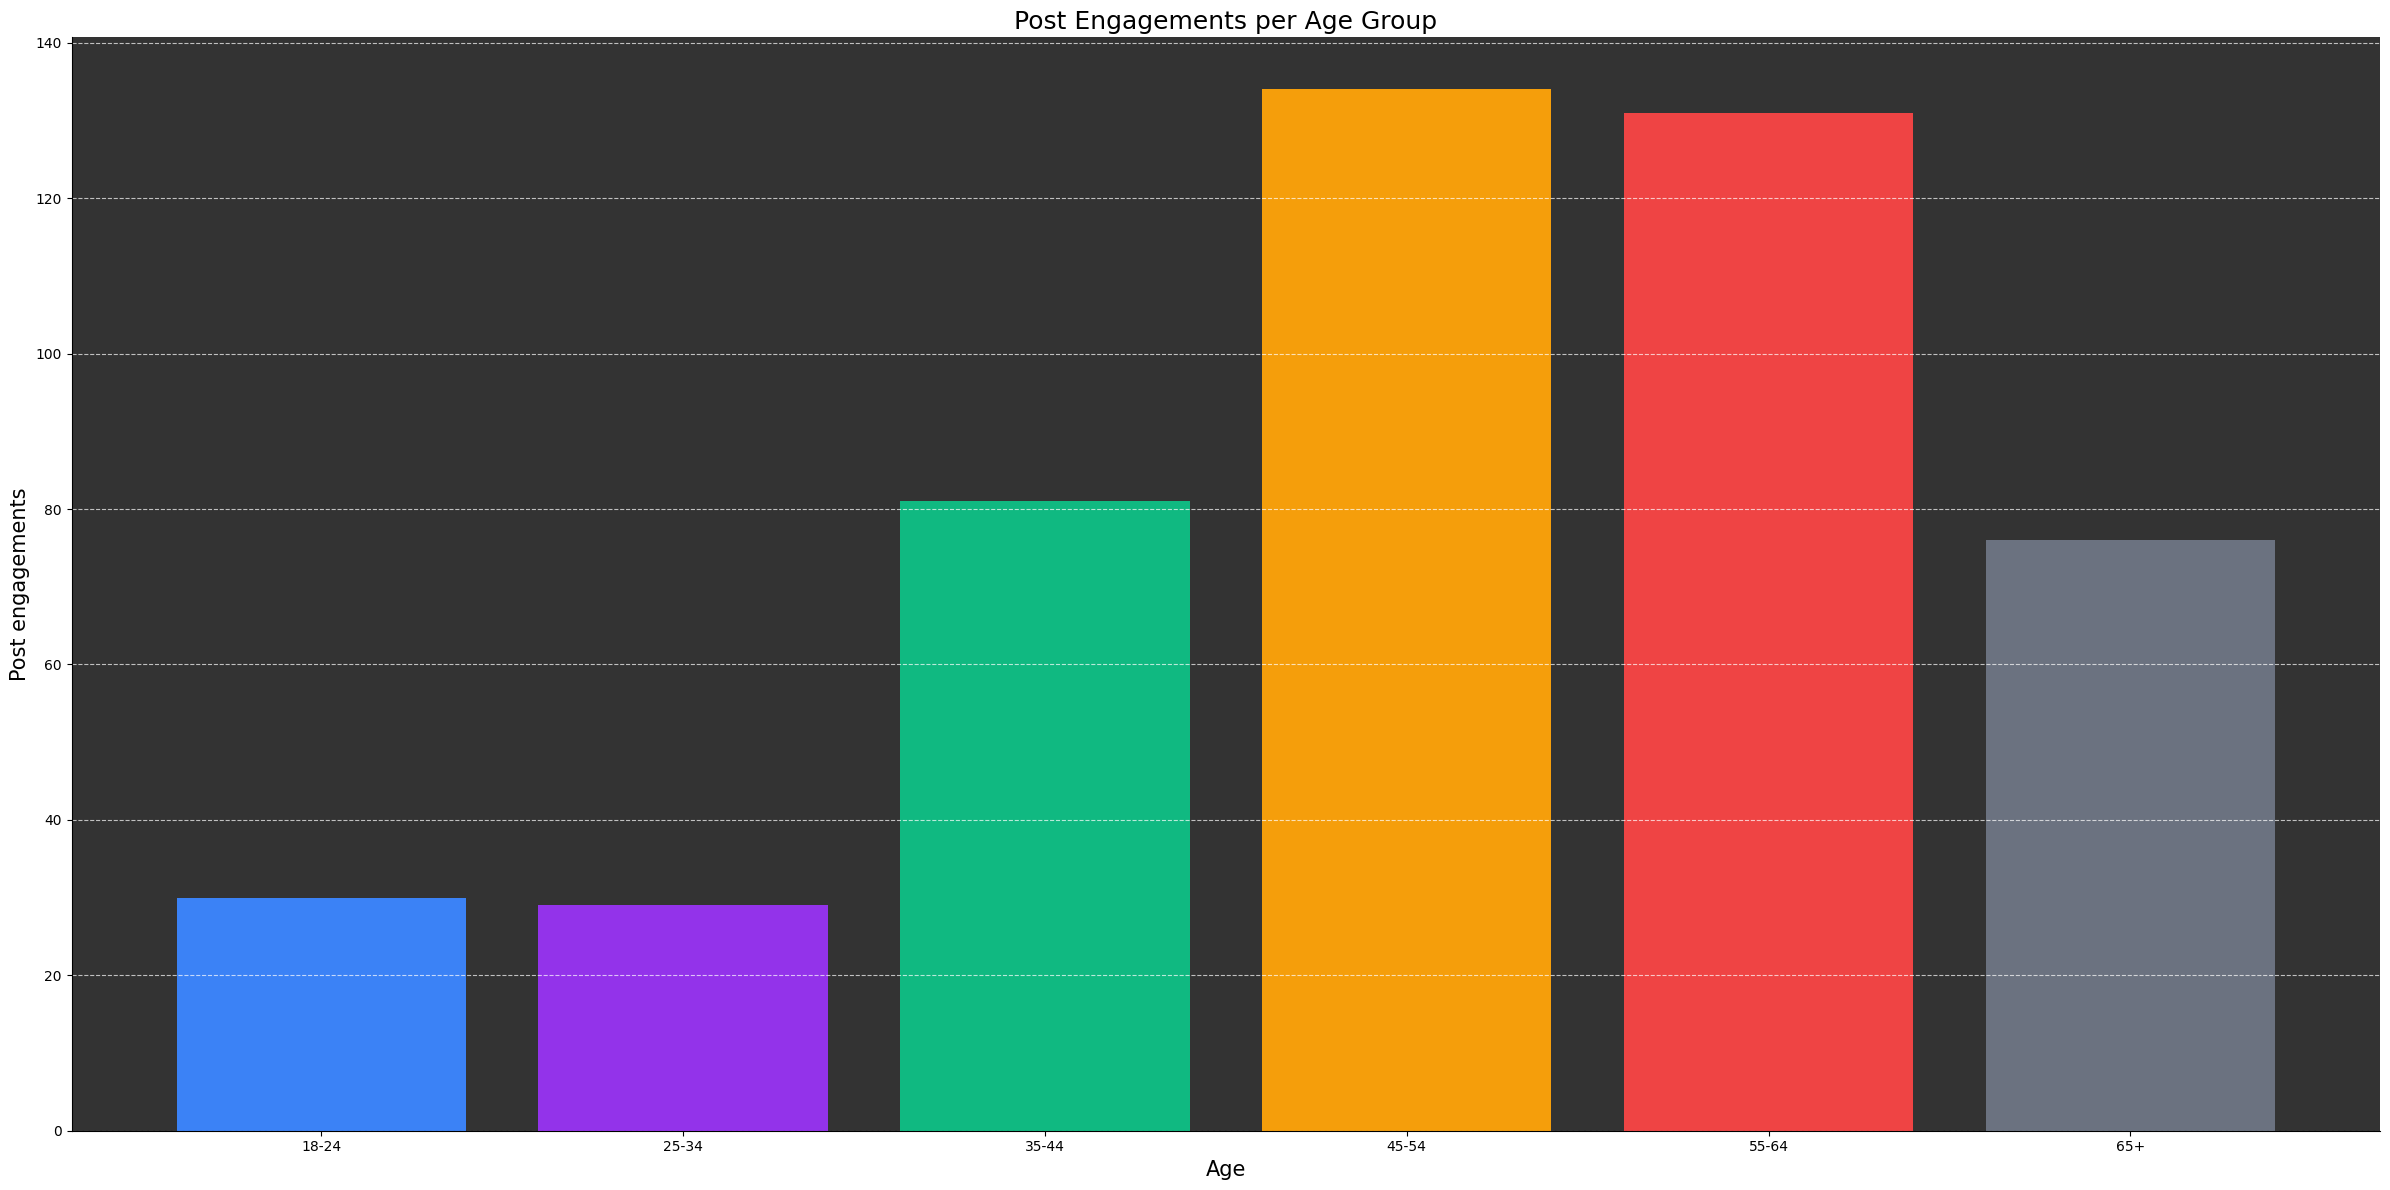

In [ ]:
visualize_total_cpc_by_weekday(age_group_zan, "Age", "Post engagements", "Post Engagements per Age Group")

# Nueva sección

In [ ]:
print(group_zan)


      Age    Weekday  Post engagements  CTR (all)  CPC (cost per link click)
1   18-24     Monday               1.0   0.444292                   0.840000
36    65+     Monday               6.0   1.523425                   1.962173
29  55-64     Monday              14.0   1.800702                   2.262583
8   25-34     Monday               3.0   1.095882                   1.339675
22  45-54     Monday              14.0   1.542797                   1.365410
15  35-44     Monday              10.0   1.531696                   1.742884
33  55-64    Tuesday              14.0   0.974836                   1.615750
5   18-24    Tuesday               4.0   0.386656                   1.180000
26  45-54    Tuesday               5.0   0.887325                   4.053333
40    65+    Tuesday               9.0   1.570135                   1.665000
12  25-34    Tuesday               5.0   0.552439                   0.762500
19  35-44    Tuesday              10.0   0.780289                   1.503333

In [ ]:
ire_aff.head()

,Campaign name,Ad Set Name,Age,Day,Delivery status,Delivery level,Reach,Impressions,Frequency,Result type,...,Cost per result,Starts,Ends,Link clicks,Page engagement,CTR (all),CPC (cost per link click),Reporting starts,Reporting ends,Weekday
1,Cold Traffic: Ireland - Conversions,18-65: {Audience #1 from Audience Worksheet - ...,45-54,2023-10-24,active,adset,391,431,1.102302,NaN,...,NaN,2023-07-25,Ongoing,NaN,NaN,0.696056,NaN,2023-10-24,2023-10-24,Tuesday
2,Cold Traffic: Ireland - Conversions,18-65: {Audience #1 from Audience Worksheet - ...,18-24,2023-10-24,active,adset,138,150,1.086957,NaN,...,NaN,2023-07-25,Ongoing,NaN,NaN,0.000000,NaN,2023-10-24,2023-10-24,Tuesday
3,Cold Traffic: Ireland - Conversions,18-65: {Audience #1 from Audience Worksheet - ...,55-64,2023-10-24,active,adset,333,386,1.159159,NaN,...,NaN,2023-07-25,Ongoing,1.0,3.0,1.295337,4.560288,2023-10-24,2023-10-24,Tuesday
4,Cold Traffic: Ireland - Conversions,18-65: {Audience #1 from Audience Worksheet - ...,25-34,2023-10-24,active,adset,363,399,1.099174,NaN,...,NaN,2023-07-25,Ongoing,1.0,1.0,0.501253,2.103192,2023-10-24,2023-10-24,Tuesday
5,Cold Traffic: Ireland - Conversions,18-65: {Audience #1 from Audience Worksheet - ...,65+,2023-10-24,active,adset,180,207,1.150000,NaN,...,NaN,2023-07-25,Ongoing,4.0,4.0,3.381643,0.563716,2023-10-24,2023-10-24,Tuesday


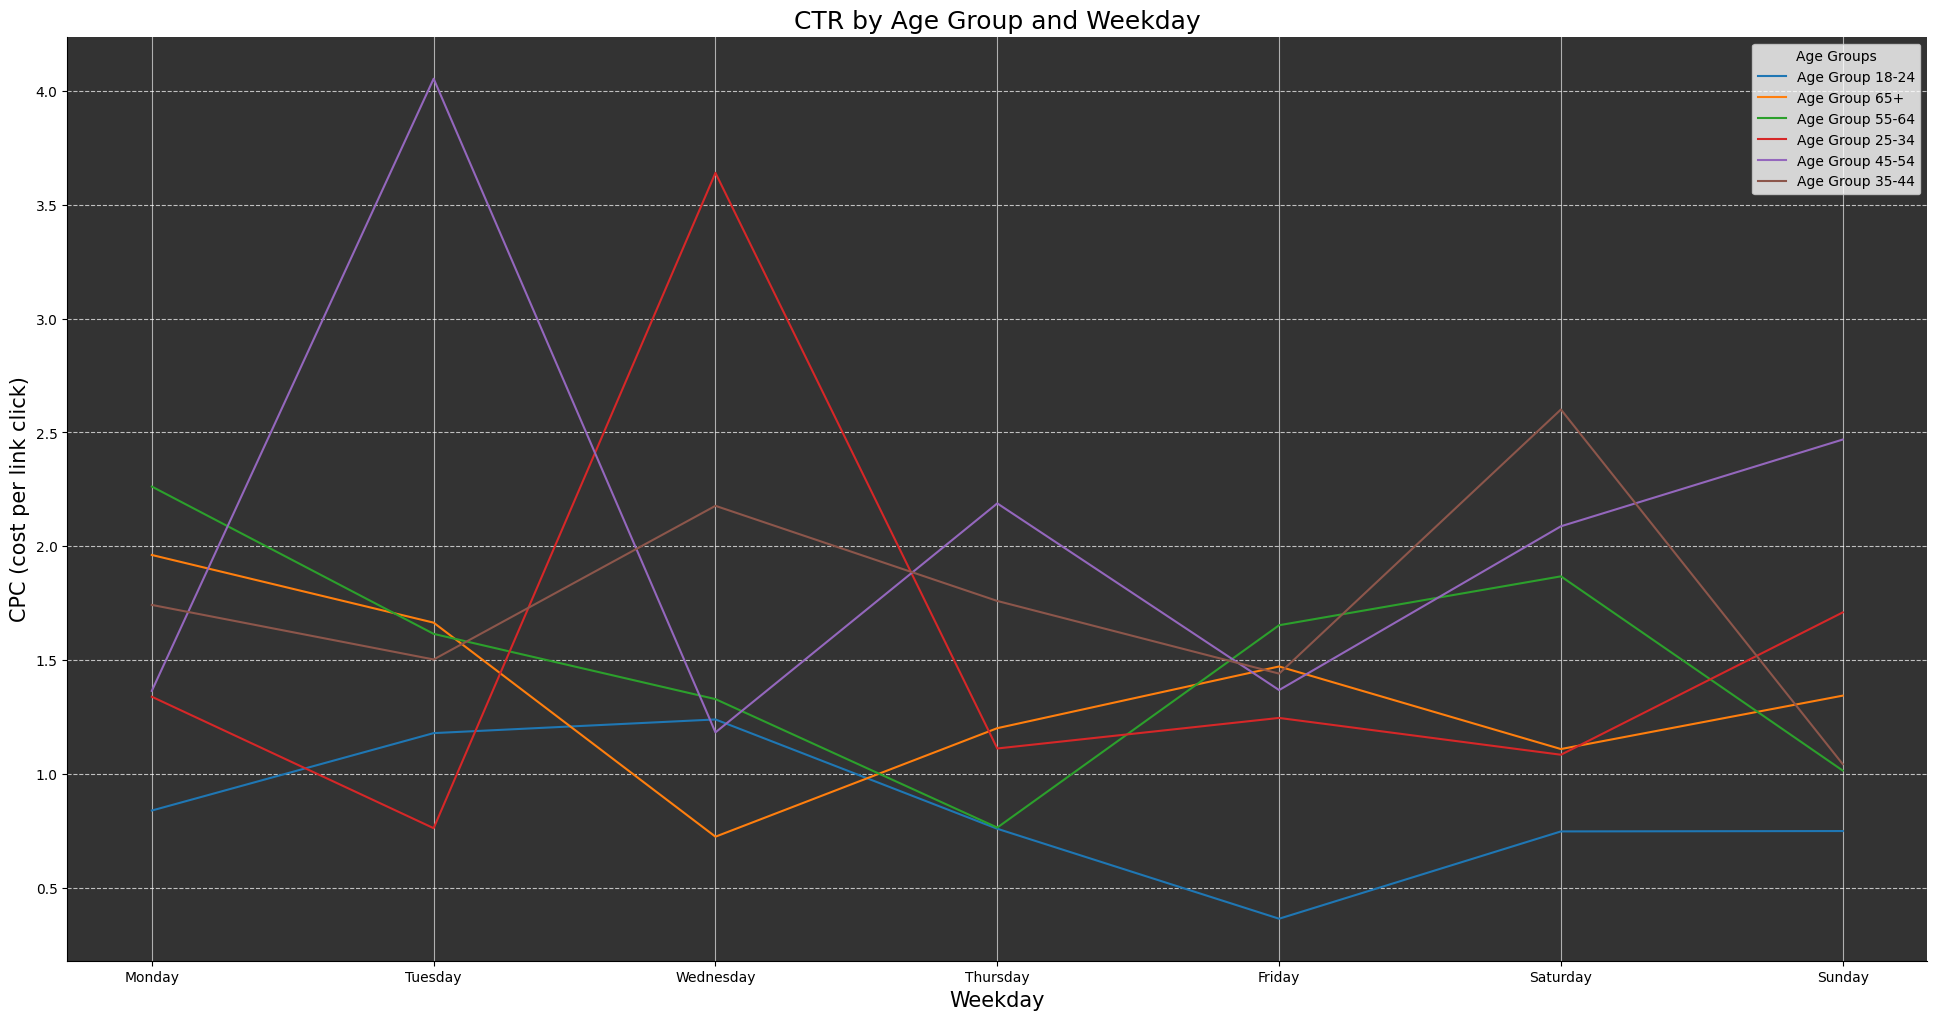

In [ ]:
visualize_age_group_data(group_zan, "CPC (cost per link click)", 'Weekday', "CPC (cost per link click)", 'CPC by Age Group and Weekday')

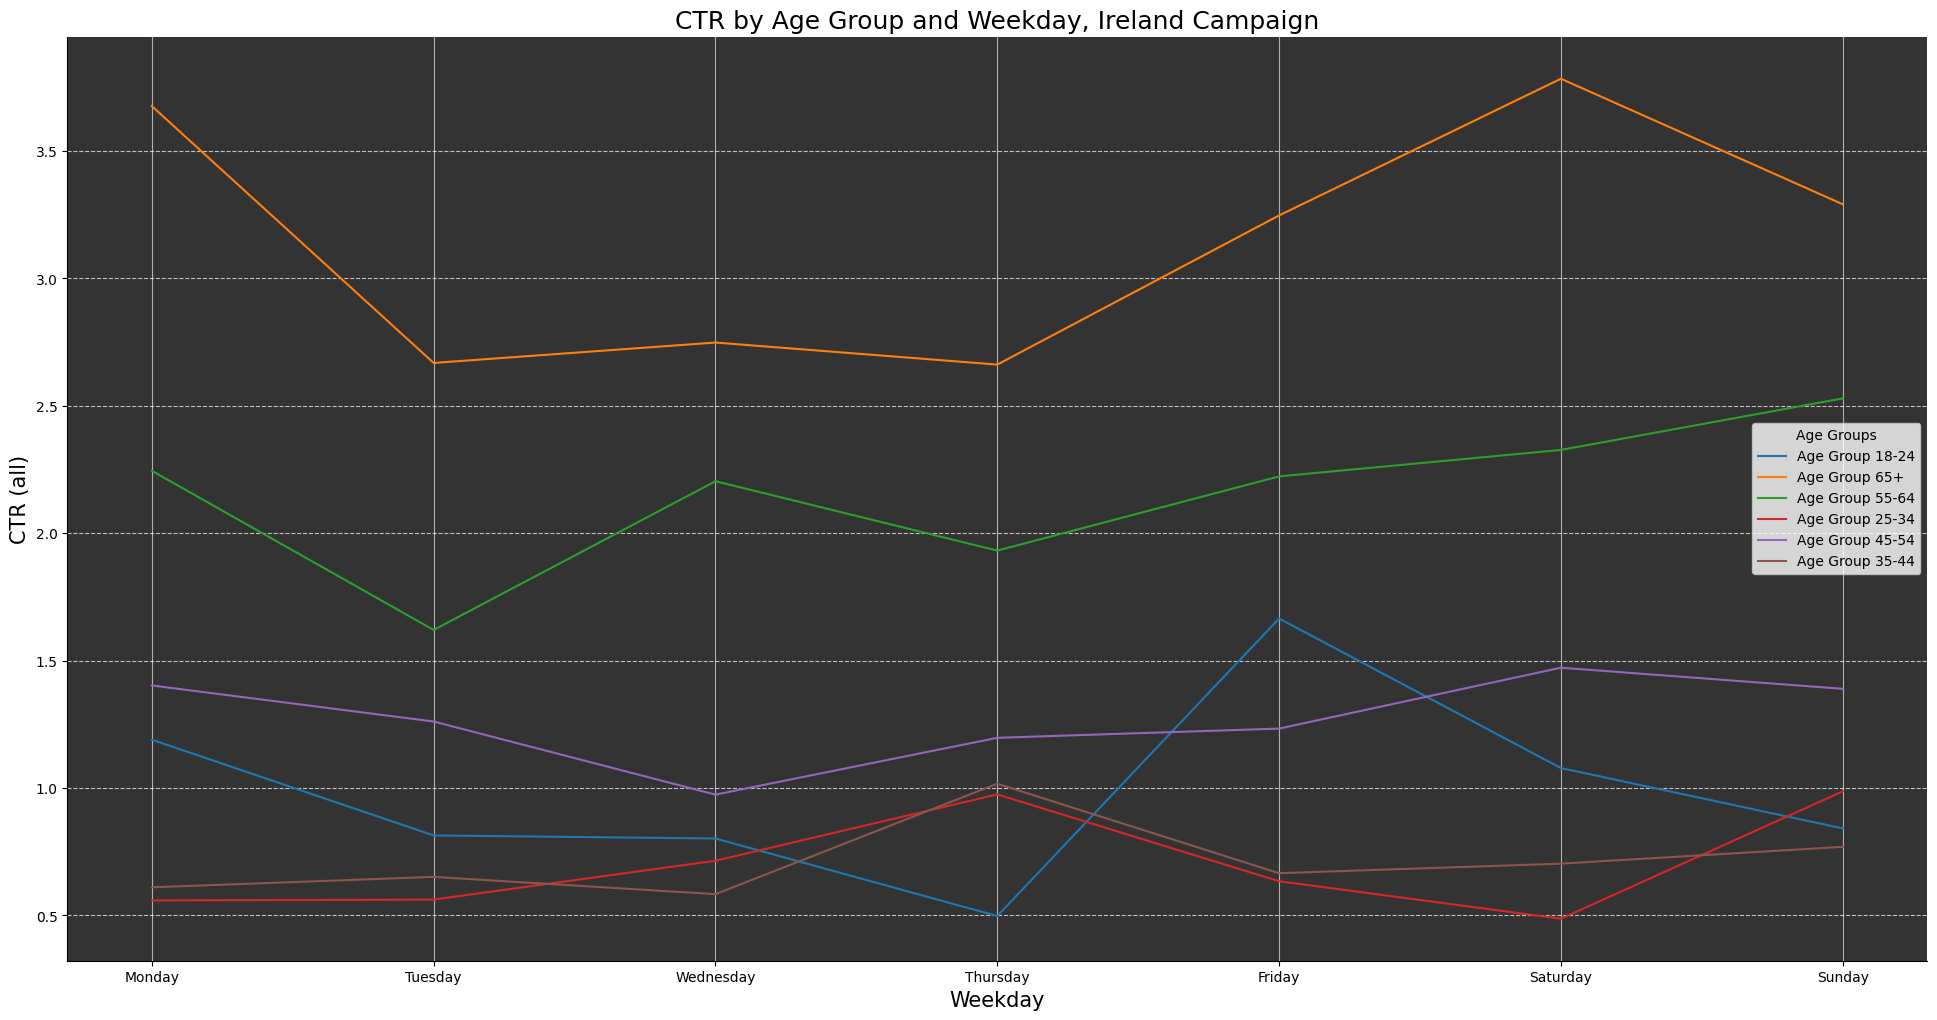

In [ ]:
visualize_age_group_data(group_ire_aff, "CTR(all)", 'Weekday', "CTR (all)", 'CTR by Age Group and Weekday, Ireland Campaign')

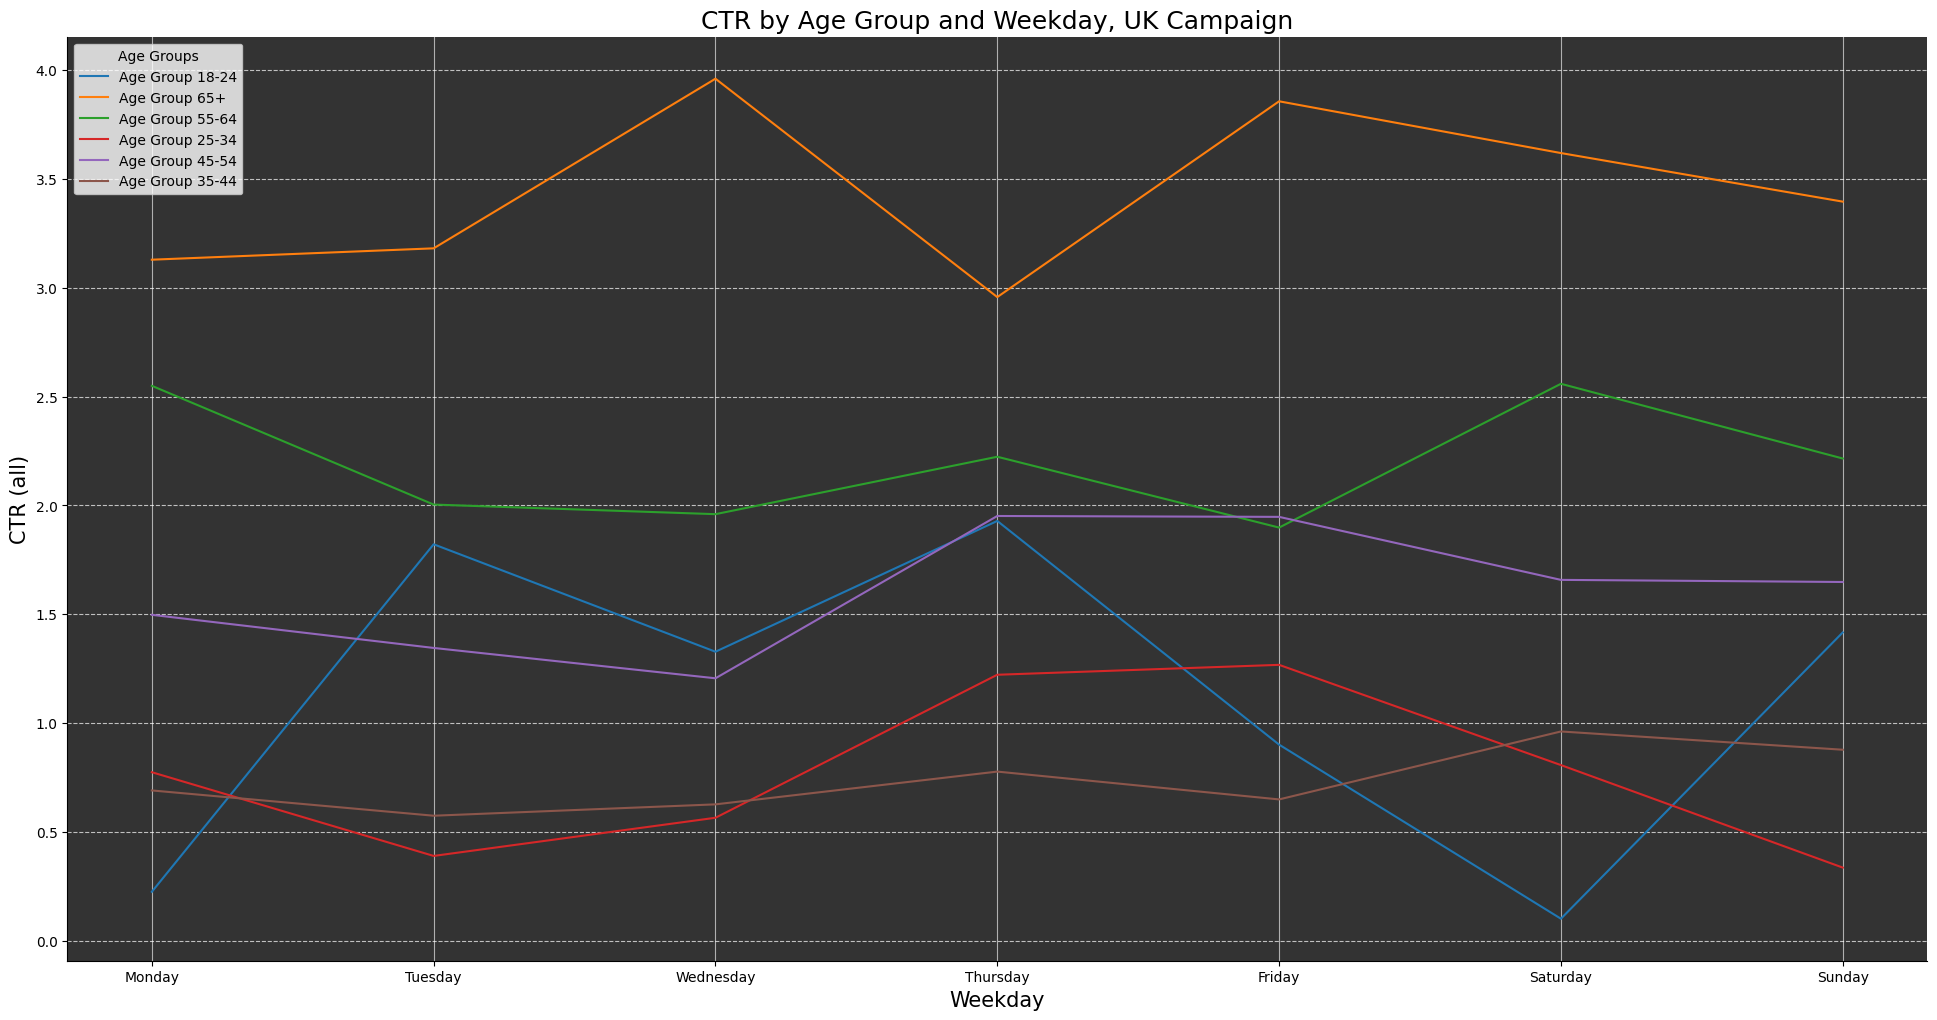

In [ ]:
visualize_age_group_data(group_uk_aff, "CTR(all)", 'Weekday', "CTR (all)", 'CTR by Age Group and Weekday, UK Campaign')

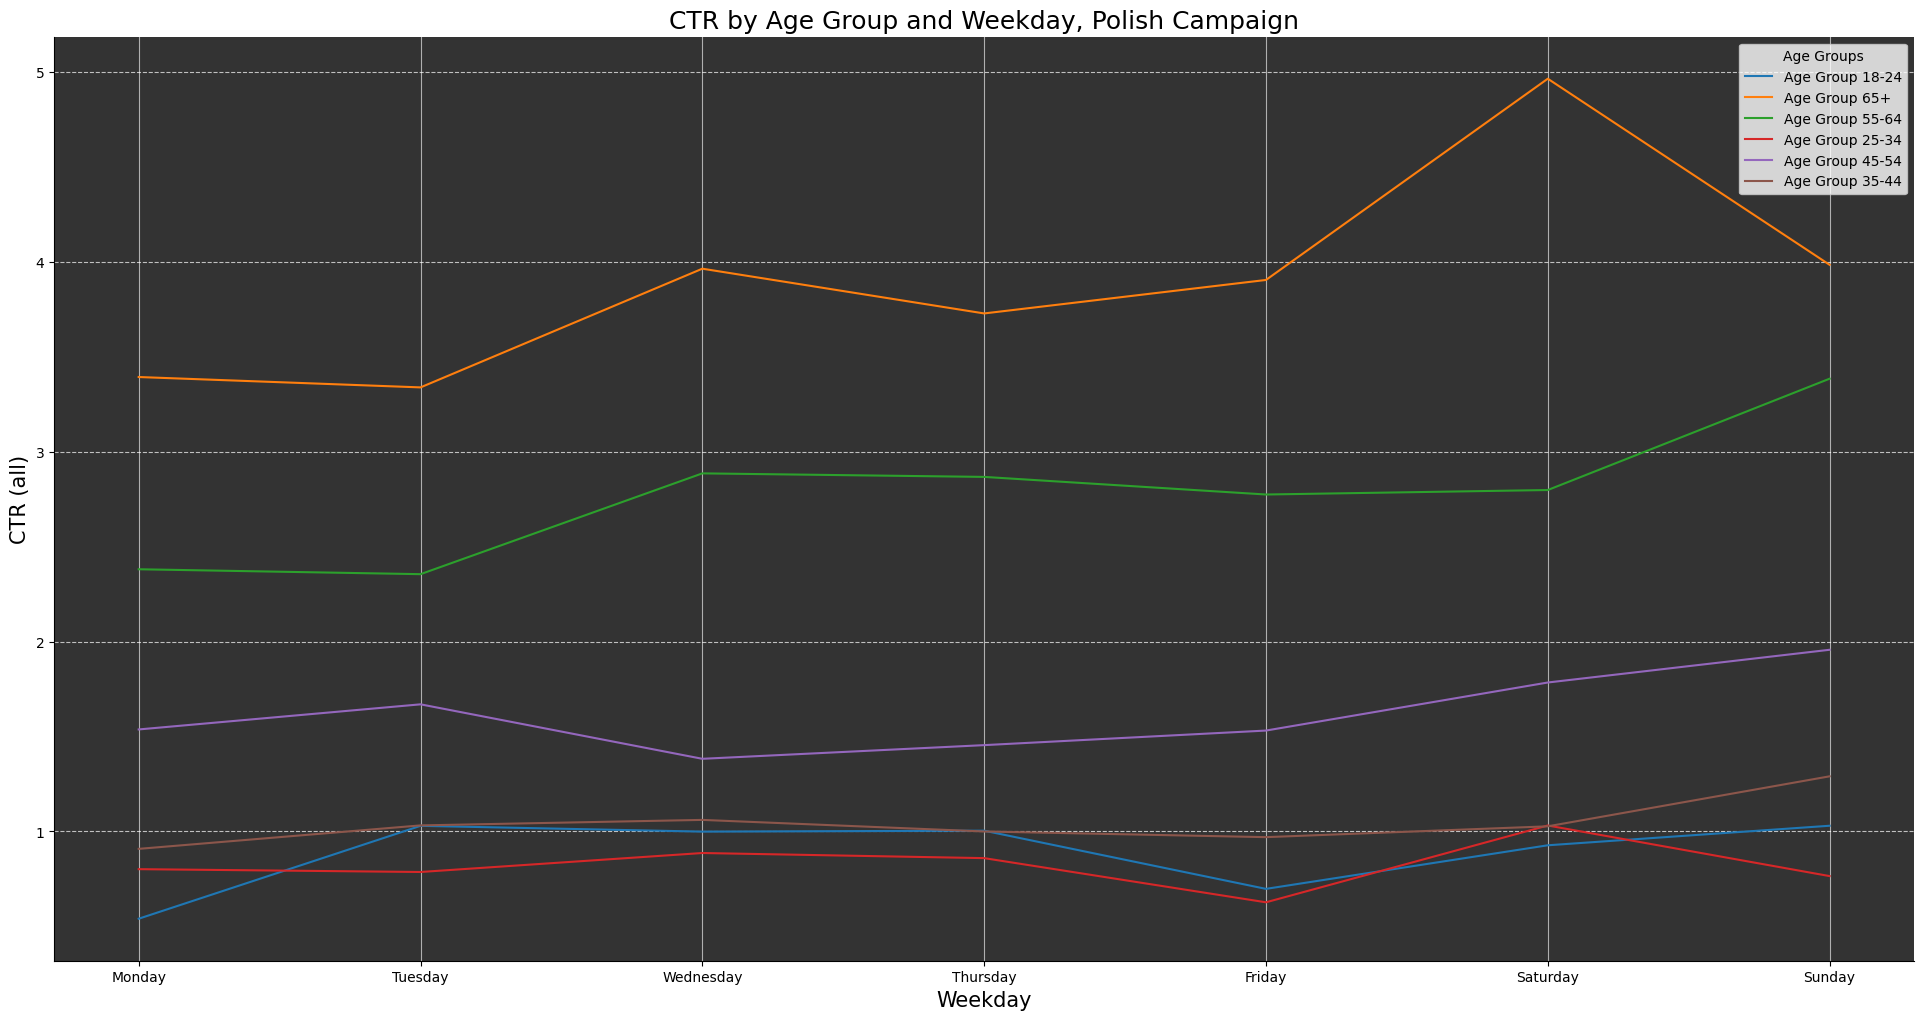

In [ ]:
visualize_age_group_data(group_pol_aff, "CTR(all)", 'Weekday', "CTR (all)", 'CTR by Age Group and Weekday, Polish Campaign')

In [ ]:
cpr_ire = ire_aff["CPC (cost per link click)"].mean()
cpr_uk = uk_aff["CPC (cost per link click)"].mean()
cpr_pol = pol_aff["CPC (cost per link click)"].mean()

In [ ]:
print(cpr_ire)

1.7407272914136125


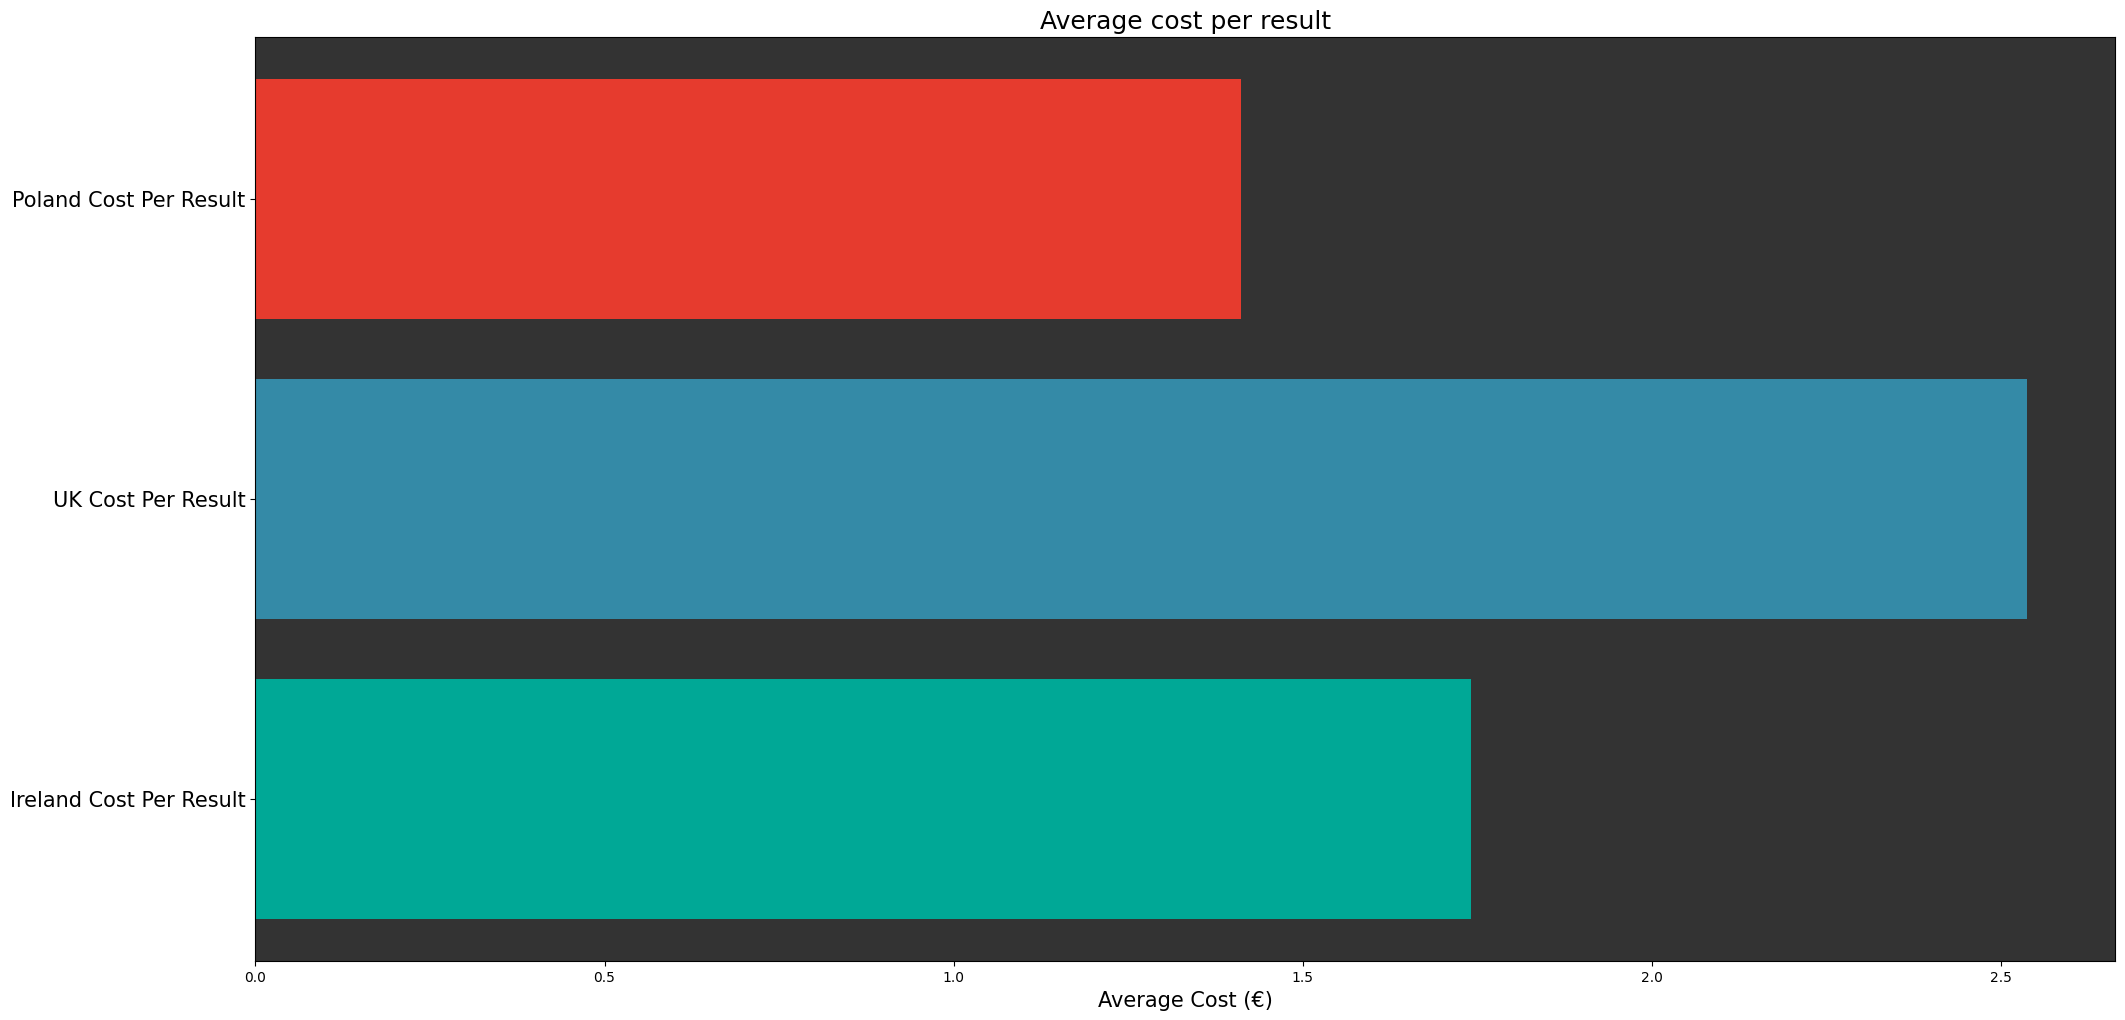

In [ ]:
# Define the categories (e.g., labels for the mean values)
categories = ["Ireland Cost Per Result", "UK Cost Per Result", "Poland Cost Per Result"]

# Define the mean values for each category
mean_values = [cpr_ire, cpr_uk, cpr_pol]

# Create an array of positions for the lollipops
positions = np.arange(len(categories))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(24, 12))

ax.set_facecolor('#333333')

bar_colors = ['#00A896', '#348AA7', '#E63B2E']

# Create horizontal bars for the mean values
ax.barh(positions, mean_values, color=bar_colors)



# Set the y-axis ticks and labels
ax.set_yticks(positions)

ax.set_yticklabels(categories,  fontsize=15)  # Increase font size

# Set the title with white color and increased font size
ax.set_title("Average cost per result", fontsize=18)  # Increase font size

# Set the x-axis label with white color and increased font size
ax.set_xlabel("Average Cost (€)",  fontsize=15)


# Set the title and labels
plt.savefig('bar_chart_cost.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

In [ ]:
monthly_engagements_total = df_aff.groupby(df_aff['Day'].dt.to_period('M'))['Page engagement'].sum().reset_index()
# Sort the DataFrame by the 'Month' column (optional but recommended)
monthly_engagements_total = monthly_engagements_total.sort_values(by='Day')

# Calculate the running total of 'Total Engagements' using cumsum
monthly_engagements_total['Running Total'] = monthly_engagements_total['Page engagement'].cumsum()


monthly_engagements_total_ire = ire_aff.groupby(ire_aff['Day'].dt.to_period('M'))['Page engagement'].sum().reset_index()
# Sort the DataFrame by the 'Month' column (optional but recommended)
monthly_engagements_total_ire = monthly_engagements_total_ire.sort_values(by='Day')

# Calculate the running total of 'Total Engagements' using cumsum
monthly_engagements_total_ire['Running Total'] = monthly_engagements_total_ire['Page engagement'].cumsum()

monthly_engagements_total_uk = uk_aff.groupby(uk_aff['Day'].dt.to_period('M'))['Page engagement'].sum().reset_index()
# Sort the DataFrame by the 'Month' column (optional but recommended)
monthly_engagements_total_uk = monthly_engagements_total_uk.sort_values(by='Day')

# Calculate the running total of 'Total Engagements' using cumsum
monthly_engagements_total_uk['Running Total'] = monthly_engagements_total_uk['Page engagement'].cumsum()

monthly_engagements_total_pol =  pol_aff.groupby(pol_aff['Day'].dt.to_period('M'))['Page engagement'].sum().reset_index()

# Sort the DataFrame by the 'Month' column (optional but recommended)
monthly_engagements_total_pol = monthly_engagements_total_pol.sort_values(by='Day')

# Calculate the running total of 'Total Engagements' using cumsum
monthly_engagements_total_pol['Running Total'] = monthly_engagements_total_pol['Page engagement'].cumsum()

In [ ]:
print(monthly_engagements_total)

print(monthly_engagements_total_ire)

print(monthly_engagements_total_pol)

print(monthly_engagements_total_uk)

       Day  Page engagement  Running Total
0  2023-08           4251.0         4251.0
1  2023-09           2546.0         6797.0
2  2023-10            814.0         7611.0
       Day  Page engagement  Running Total
0  2023-08            523.0          523.0
1  2023-09            461.0          984.0
2  2023-10            361.0         1345.0
       Day  Page engagement  Running Total
0  2023-08            701.0          701.0
1  2023-09            644.0         1345.0
2  2023-10            274.0         1619.0
       Day  Page engagement  Running Total
0  2023-08            323.0          323.0
1  2023-09            275.0          598.0
2  2023-10            179.0          777.0


In [ ]:
monthly_engagements_total["Page engagement"] = monthly_engagements_total["Page engagement"].astype("float")

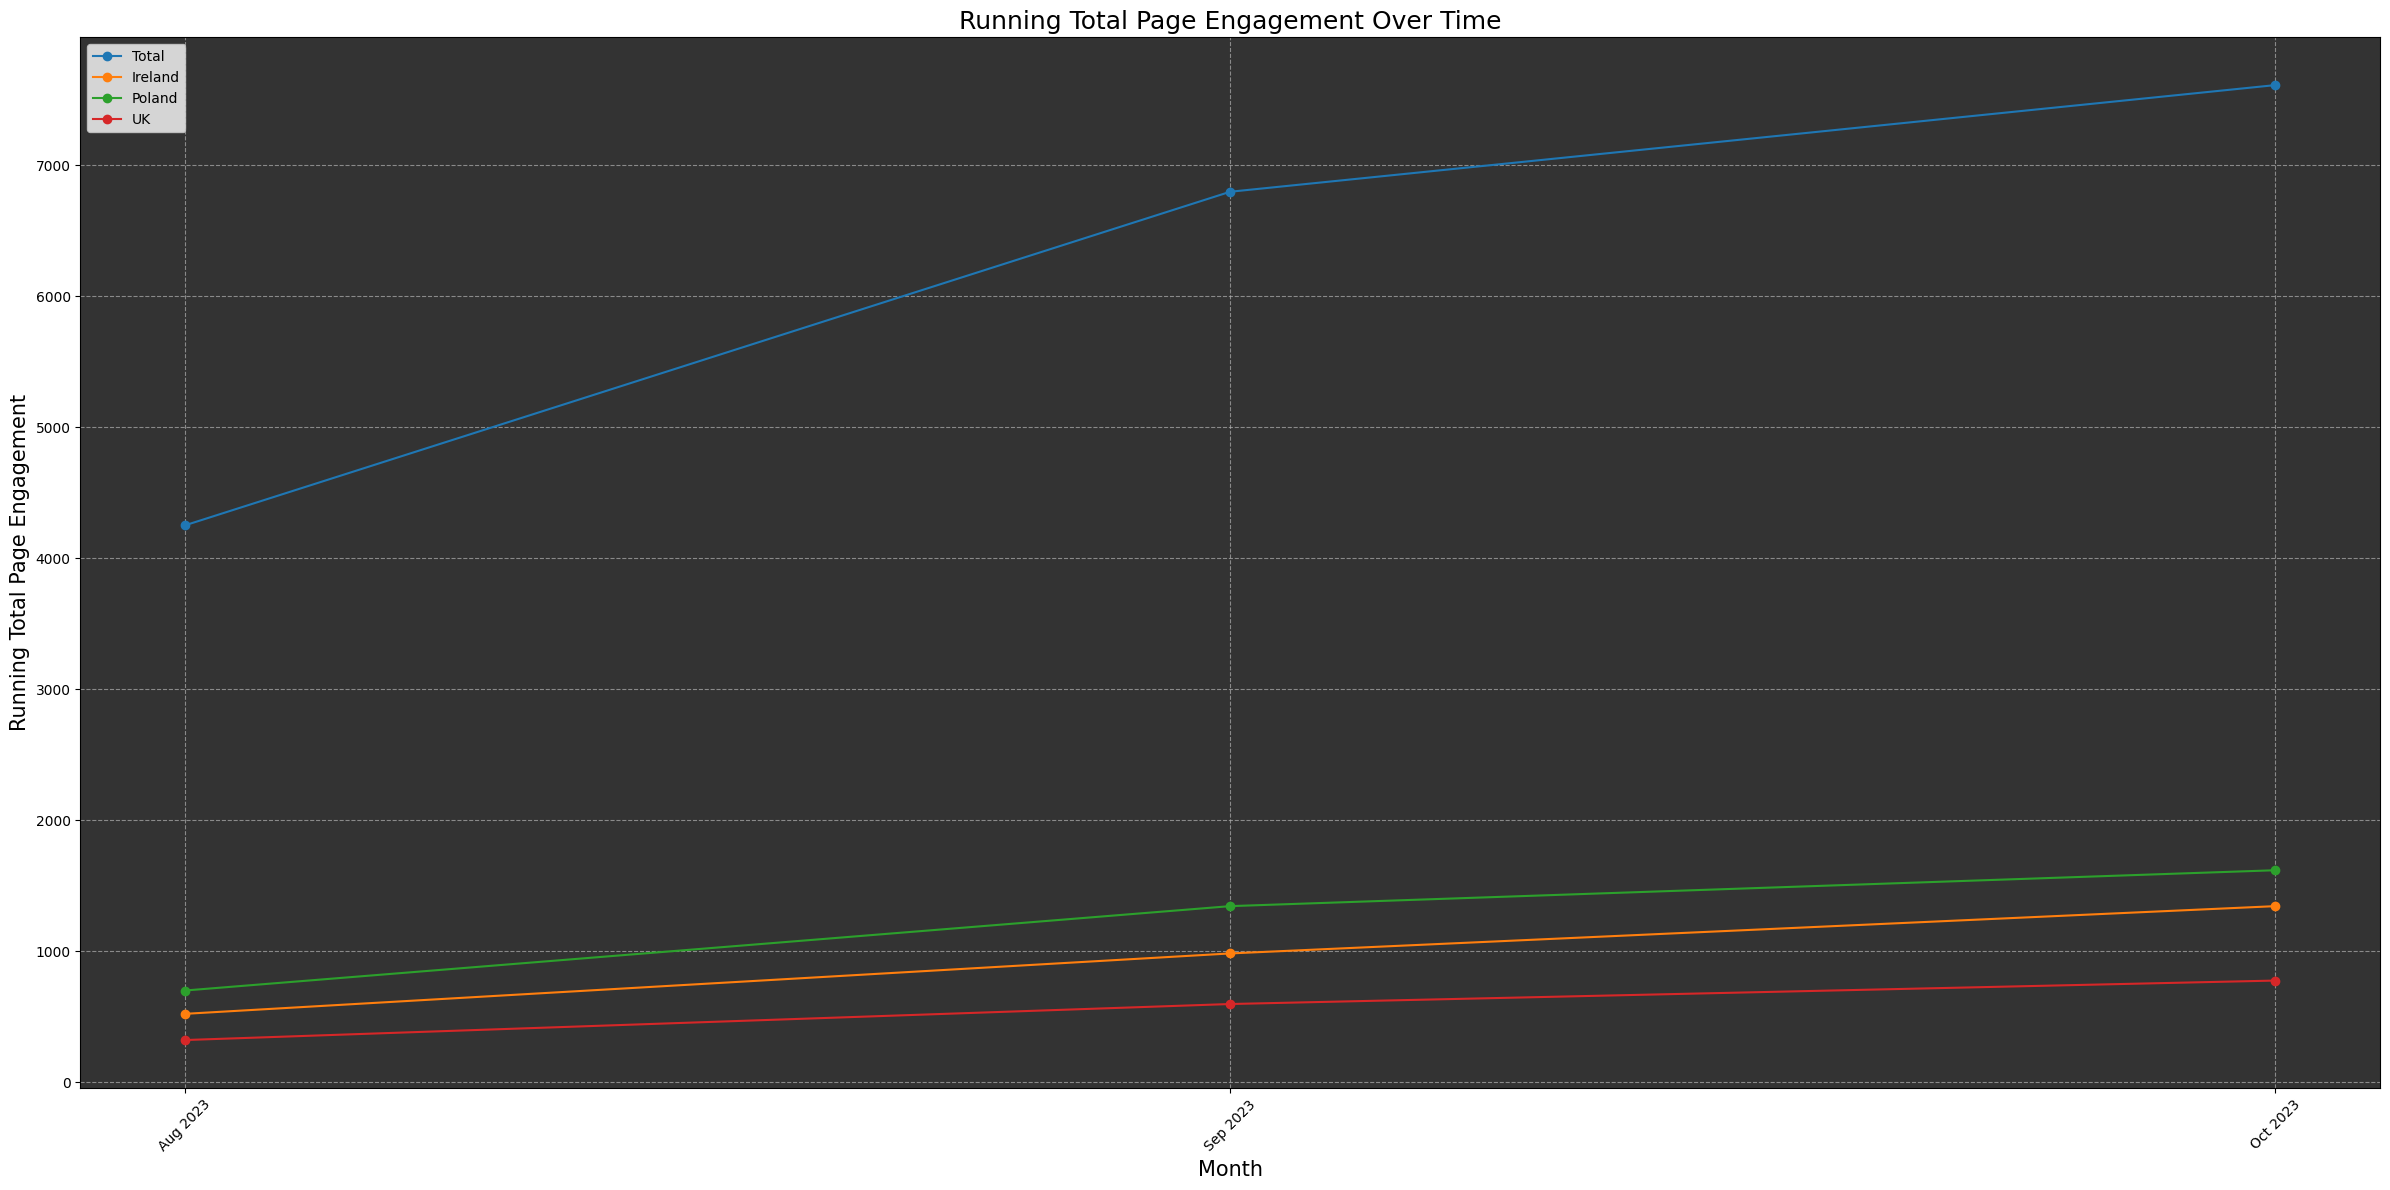

In [ ]:


# Assuming you have separate DataFrames for different campaigns/regions
# monthly_engagements_total, monthly_engagements_total_ire, monthly_engagements_total_pol, monthly_engagements_total_uk

# Create a figure and axis
fig, ax = plt.subplots(figsize=(24, 12))

ax.set_facecolor('#333333')

# Convert the 'Day' column to a string format
monthly_engagements_total['Day'] = monthly_engagements_total['Day'].dt.strftime('%b %Y')
monthly_engagements_total_ire['Day'] = monthly_engagements_total_ire['Day'].dt.strftime('%b %Y')
monthly_engagements_total_pol['Day'] = monthly_engagements_total_pol['Day'].dt.strftime('%b %Y')
monthly_engagements_total_uk['Day'] = monthly_engagements_total_uk['Day'].dt.strftime('%b %Y')

# Plot the running total for each campaign/region
plt.plot(monthly_engagements_total['Day'], monthly_engagements_total['Running Total'], marker='o', label='Total')
plt.plot(monthly_engagements_total_ire['Day'], monthly_engagements_total_ire['Running Total'], marker='o', label='Ireland')
plt.plot(monthly_engagements_total_pol['Day'], monthly_engagements_total_pol['Running Total'], marker='o', label='Poland')
plt.plot(monthly_engagements_total_uk['Day'], monthly_engagements_total_uk['Running Total'], marker='o', label='UK')


# Set the title and labels
plt.title("Running Total Page Engagement Over Time", fontsize=18)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Running Total Page Engagement", fontsize=15)


# Set the gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.savefig('engagement.png', dpi=300, bbox_inches='tight')
plt.show()

TypeError: ignored

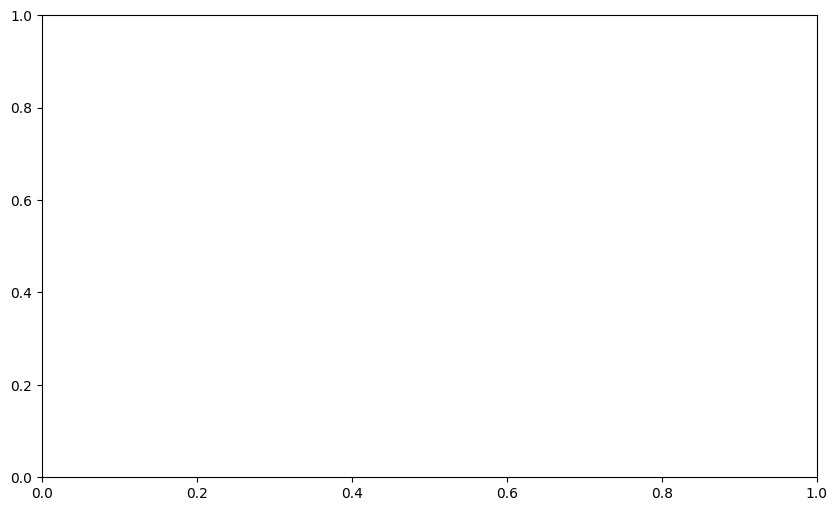

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'monthly_engagements' is your DataFrame with 'Month' and 'Total Engagements' columns
# Make sure the 'Month' column is of datetime type


# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the line graph
plt.plot(monthly_engagements_total['Day'], monthly_engagements_total['Page engagement'], marker='o', color='b', linestyle='-', linewidth=2, markersize=6)

# Set the title and labels
plt.title("Total Engagements per Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Engagements", fontsize=12)

# Format the x-axis as months
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%b %Y"))

# Set the gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
age_group_tene = aggregate_data(df_tene, [ "Link clicks", "Post engagements", "Impressions"], ["CTR (all)", "CPC (cost per link click)"], ["Age", "Weekday"])

age_group_soto = aggregate_data(df_soto, [ "Link clicks", "Post engagements", "Impressions"], ["CTR (all)", "CPC (cost per link click)"], ["Age", "Weekday"])

age_group_ibiza = aggregate_data(data_ibiza, [ "Link clicks", "Post engagements"], ["CTR (all)", "CPC (cost per link click)"], ["Age", "Weekday"])

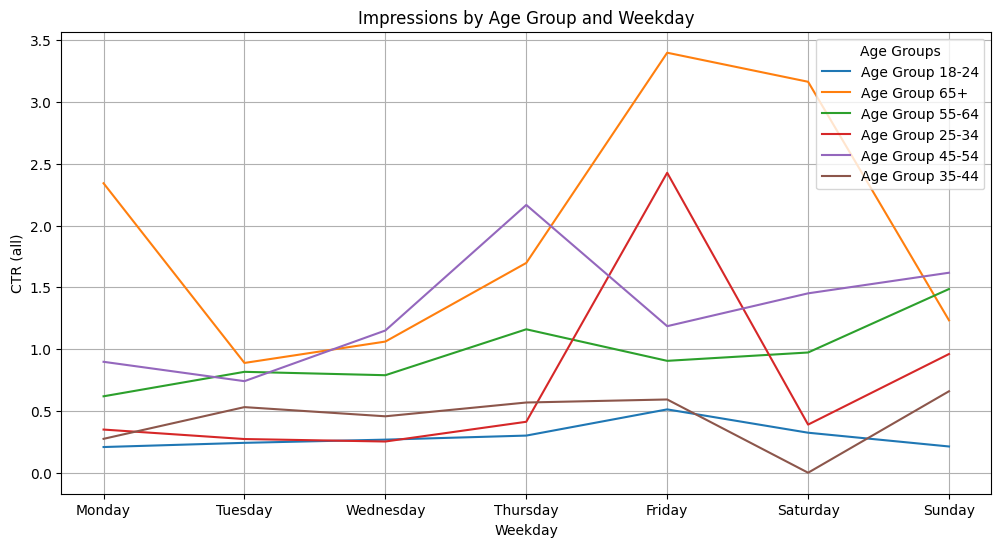

In [ ]:
visualize_age_group_data(age_group_soto, "CTR(all)", 'Weekday', "CTR (all)", 'Impressions by Age Group and Weekday')

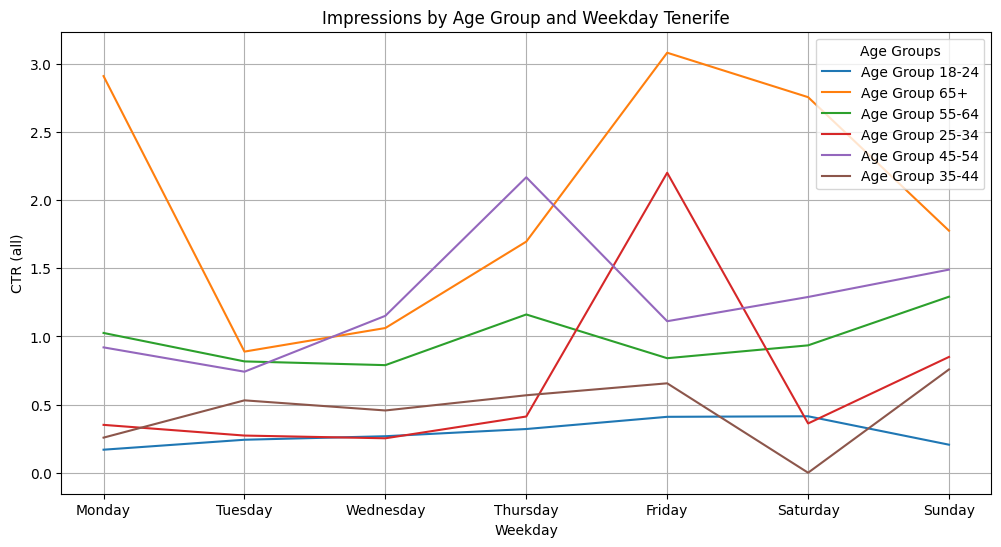

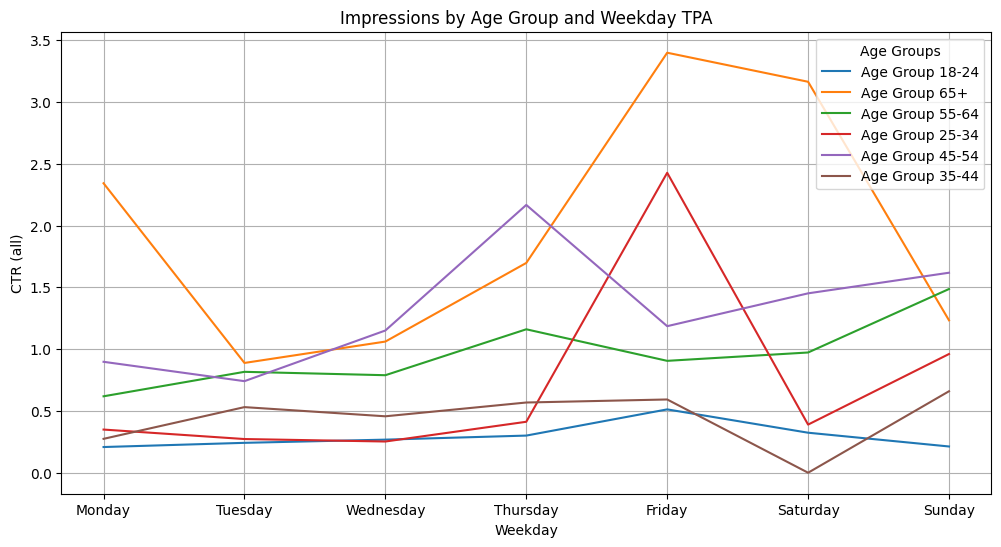

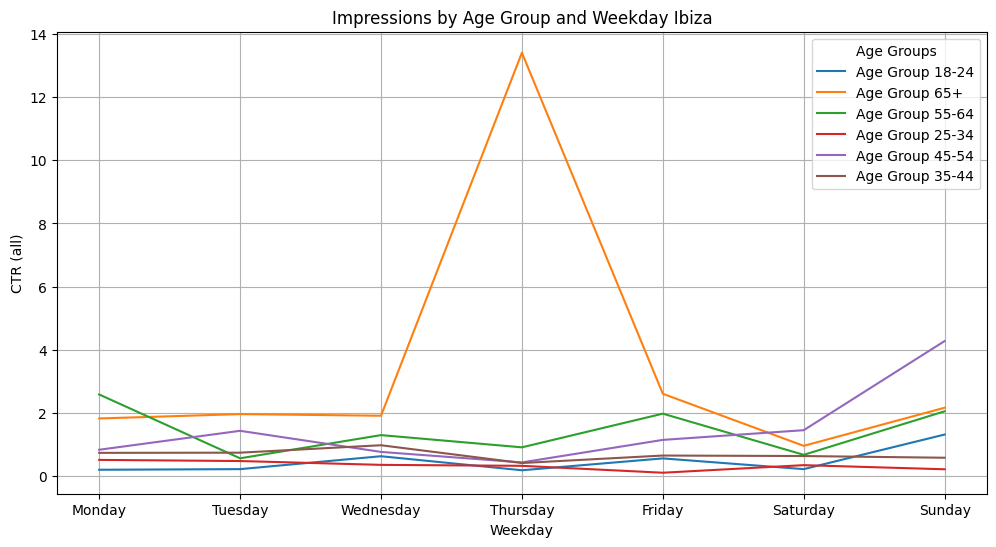

In [ ]:
visualize_age_group_data(age_group_tene, "CTR(all)", 'Weekday', "CTR (all)", 'Impressions by Age Group and Weekday Tenerife')

visualize_age_group_data(age_group_soto, "CTR(all)", 'Weekday', "CTR (all)", 'Impressions by Age Group and Weekday TPA')

visualize_age_group_data(age_group_ibiza, "CTR(all)", 'Weekday', "CTR (all)", 'Impressions by Age Group and Weekday Ibiza')

<BarContainer object of 42 artists>

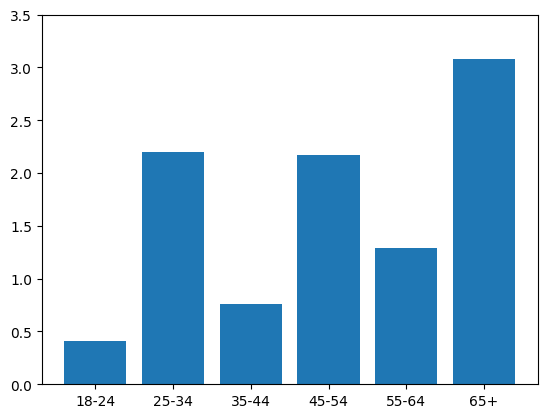

In [ ]:
age_group_tene = age_group_tene.sort_values("Age")
age_group_soto = age_group_soto.sort_values("Age")

plt.ylim(0, 3.5)
plt.bar(age_group_tene['Age'], age_group_tene["CTR (all)"])



<BarContainer object of 42 artists>

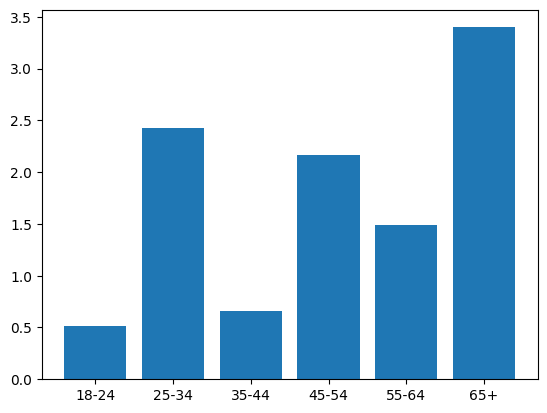

In [ ]:
plt.bar(age_group_soto["Age"], age_group_soto["CTR (all)"])

In [ ]:
# Example data (replace with your actual data)
age_groups = age_group_tene['Age']
impressions = age_group_tene['Impressions']

# Calculate the total impressions
total_impressions = sum(impressions)

# Calculate the percentages for each age group
percentages = [(impression / total_impressions) * 100  for impression in impressions]

# Create the bar chart
plt.bar(age_groups, percentages)

NameError: ignored

In [ ]:
age_group_tene_ml =aggregate_data(df_tene, ["Link clicks"], ["CTR (all)", "CPC (cost per link click)"], ["Age", "Weekday"])

In [ ]:
age_group_tene_ml.head()

,Age,Weekday,Link clicks,CTR (all),CPC (cost per link click)
0,18-24,Friday,2.0,0.410065,0.810000
1,18-24,Monday,1.0,0.168919,0.618186
2,18-24,Saturday,3.0,0.414081,0.630000
3,18-24,Sunday,1.0,0.205529,2.140000
4,18-24,Thursday,2.0,0.320578,0.630000


In [ ]:
age_group_tene = aggregate_data(df_tene, [ "Link clicks", "Post engagements", "Impressions"], ["CTR (all)", "CPC (cost per link click)"], ["Age", "Weekday"])

age_group_tene.head()

,Age,Weekday,Link clicks,Post engagements,Impressions,CTR (all),CPC (cost per link click)
1,18-24,Monday,1.0,1.0,1068,0.168919,0.618186
36,65+,Monday,16.0,18.0,1124,2.909228,0.863661
29,55-64,Monday,11.0,12.0,1765,1.025196,2.114938
8,25-34,Monday,4.0,4.0,1136,0.351023,1.255000
22,45-54,Monday,10.0,12.0,1491,0.919473,1.701250


In [ ]:
age_group_soto = aggregate_data(df_soto, [ "Link clicks", "Post engagements", "Impressions"], ["CTR (all)", "CPC (cost per link click)"], ["Age", "Weekday"])

In [ ]:
age_group_ibiza = aggregate_data(data_ibiza, [ "Link clicks", "Post engagements"], ["CTR (all)", "CPC (cost per link click)"], ["Age"])
print(age_group_ibiza)


     Age  Link clicks  Post engagements  CTR (all)  CPC (cost per link click)
0  18-24         17.0              23.0   0.456661                   0.323553
1  25-34         30.0              39.0   0.345808                   0.923280
2  35-44         63.0              93.0   0.686123                   1.579962
3  45-54         89.0              96.0   1.418021                   1.365587
4  55-64         68.0              91.0   1.426496                   0.862570
5    65+         78.0              88.0   3.540276                   0.599337


In [ ]:
age_group_ibiza.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 1 to 17
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Age                        42 non-null     object  
 1   Weekday                    42 non-null     category
 2   Impressions                42 non-null     int64   
 3   Link clicks                42 non-null     float64 
 4   Post engagements           42 non-null     float64 
 5   CTR (all)                  42 non-null     float64 
 6   CPC (cost per link click)  42 non-null     float64 
dtypes: category(1), float64(4), int64(1), object(1)
memory usage: 3.7+ KB


TypeError: ignored

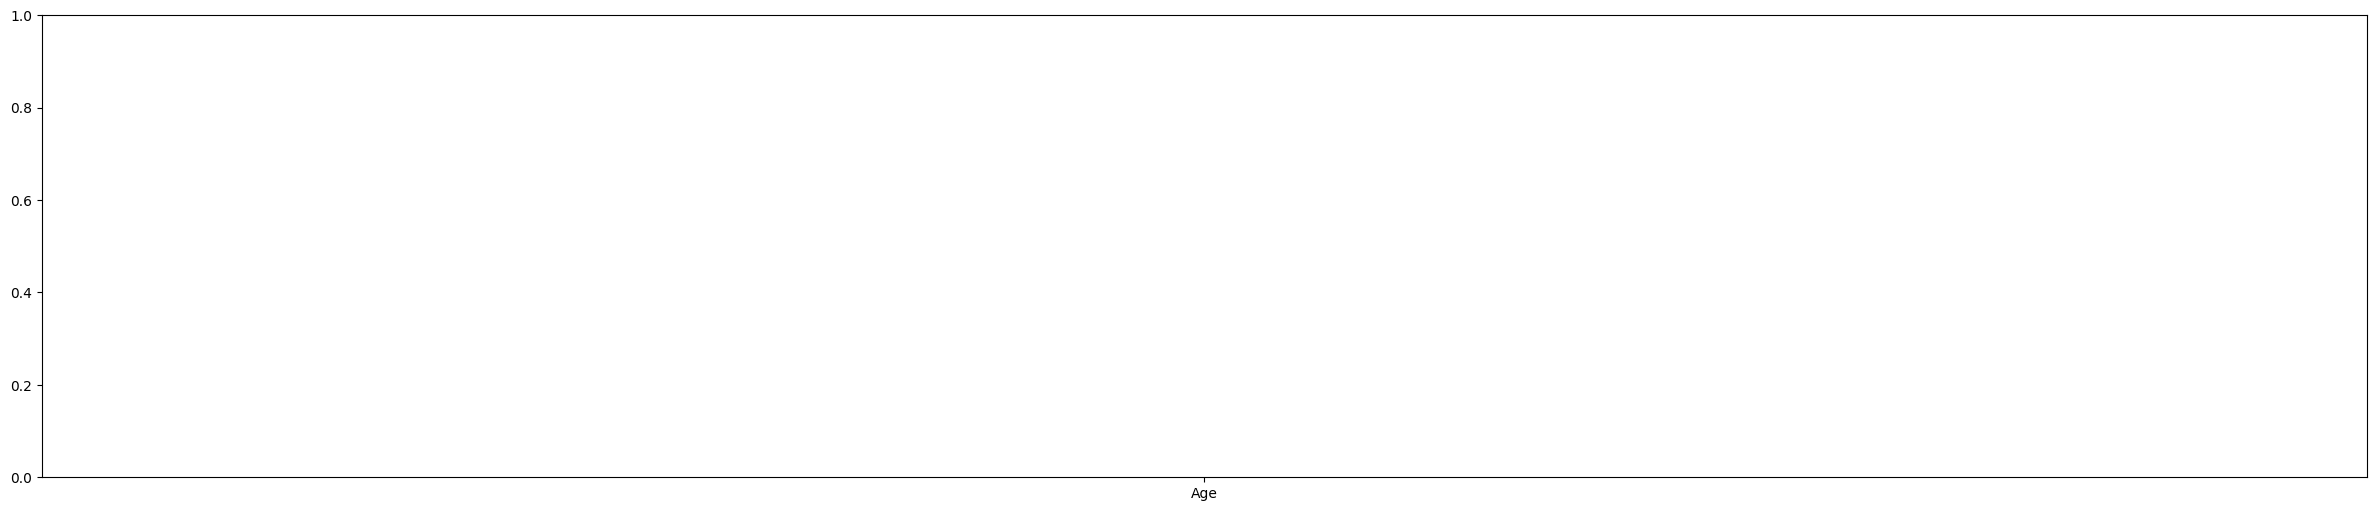

In [ ]:
plt.figure(figsize= (30, 6))

for age_group in age_group_ibiza.index:
    plt.plot(age_group_ibiza.columns, age_group_ibiza.loc[age_group], label=f'Age Group {age_group}')

    # Customize the plot
plt.xlabel('Date')
plt.ylabel('CTR')  # Replace 'Value' with the appropriate label for your data
plt.title('CTR by Age Group Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

In [ ]:
create_line_plot(pivot_ibiza["Link clicks"], "Weekday", "CTR (all)", "Average Link Clicks Per Age Group by Day")

ValueError: ignored

<Figure size 1200x600 with 0 Axes>

In [ ]:
age_group_ibiza.head(20)

,Age,Weekday,Impressions,Link clicks,Post engagements,CTR (all),CPC (cost per link click)
1,18-24,Monday,1144,3.0,3.0,0.204069,0.355000
36,65+,Monday,1098,14.0,15.0,1.827634,0.702350
29,55-64,Monday,1882,11.0,11.0,2.586720,0.926754
8,25-34,Monday,3012,5.0,8.0,0.516575,0.785872
22,45-54,Monday,3307,14.0,16.0,0.837543,1.260056
15,35-44,Monday,3972,11.0,19.0,0.738919,1.329127
33,55-64,Tuesday,1685,6.0,12.0,0.566686,1.055000
5,18-24,Tuesday,885,2.0,2.0,0.223979,0.265000
26,45-54,Tuesday,3075,6.0,8.0,1.436864,1.869000
40,65+,Tuesday,1016,10.0,10.0,1.965422,0.559167


In [ ]:
create_line_plot(pivot_ibiza["CTR (all)"], "Weekday", "CTR", "Average Link Clicks Per Age Group by Day", "Age Group")

KeyError: ignored

In [ ]:

pivot(index='Weekday', columns='Age', values=["Post engagements", "Impressions", "Post reactions","Link clicks","CPC (cost per link click)","CTR (all)"])

age_group_tene = df_tene.groupby(['Age', "Weekday"])["Post engagements", "Impressions", "Post reactions","Link clicks","CPC (cost per link click)","CTR (all)"].mean().reset_index()

NameError: ignored

In [ ]:
age_group_tene.head(20)

,Age,Weekday,Post engagements,Impressions,Post reactions,Link clicks,CPC (cost per link click),CTR (all)
0,18-24,0,1.000000,66.750000,NaN,1.000000,0.618186,0.168919
1,18-24,1,1.000000,65.000000,NaN,1.000000,1.230000,0.241875
2,18-24,2,1.000000,60.875000,NaN,1.000000,1.249819,0.267723
3,18-24,3,1.000000,46.600000,NaN,1.000000,0.630000,0.320578
4,18-24,4,1.000000,46.866667,1.0,1.000000,0.810000,0.410065
5,18-24,5,1.000000,43.800000,NaN,1.000000,0.630000,0.414081
6,18-24,6,1.000000,63.733333,NaN,1.000000,2.140000,0.205529
7,25-34,0,1.000000,66.823529,NaN,1.000000,1.255000,0.351023
8,25-34,1,1.000000,65.066667,1.0,1.000000,1.180000,0.272569
9,25-34,2,1.333333,51.888889,NaN,1.333333,1.051448,0.252587


KeyError: ignored

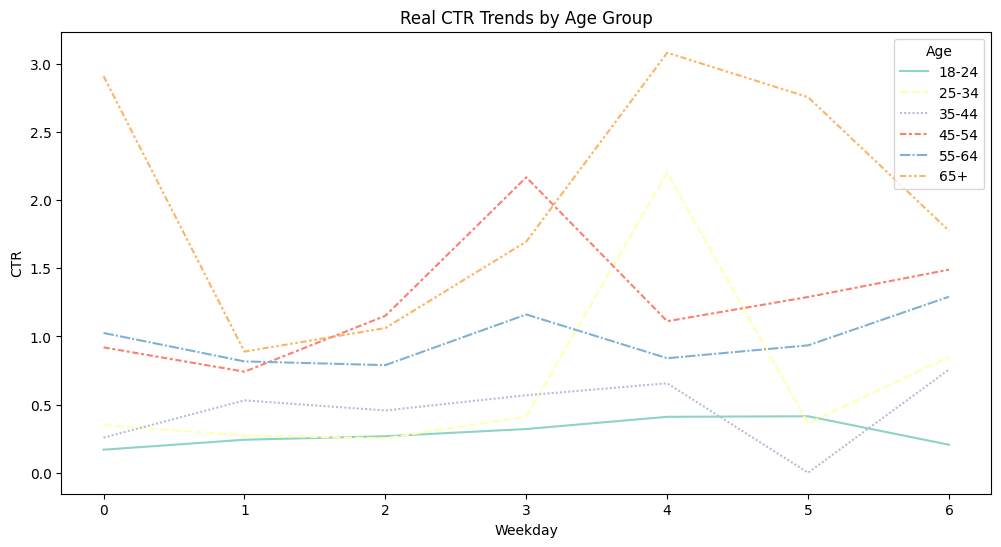

In [ ]:


pivot_age_group_tene = age_group_tene.pivot(index='Weekday', columns='Age', values=["Post engagements", "Impressions", "Post reactions","Link clicks","CPC (cost per link click)","CTR (all)"])

plt.figure(figsize=(12, 6))
sns.lineplot(data=pivot_age_group_tene['CTR (all)'], palette="Set3", linestyle="-")
plt.xlabel('Weekday')
plt.ylabel('CTR')
plt.title('Real CTR Trends by Age Group')
plt.legend(title='Age Group', labels=pivot_age_group_tene["Weekday"])
plt.show()

KeyError: ignored

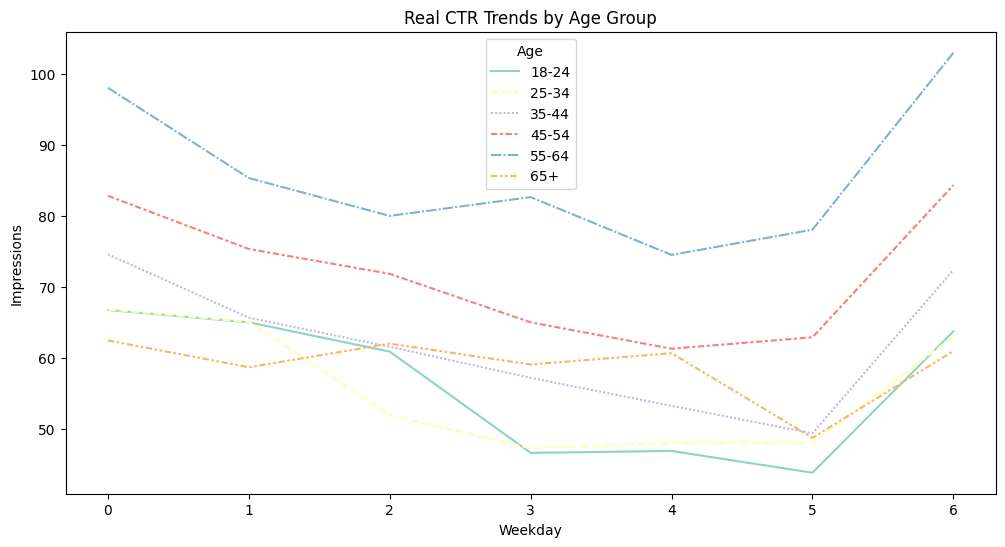

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=pivot_age_group_tene['Impressions'], palette="Set3", linestyle="-")
plt.xlabel('Weekday')
plt.ylabel('Impressions')
plt.title('Real CTR Trends by Age Group')
plt.legend(title='Age Group', labels=pivot_age_group_tene["Weekday"])
plt.show()

In [ ]:
# One-Hot-Coding my Dataset
data_marbella = pd.get_dummies(data_marbella, columns=['Age', "Gender", "Weekday"], prefix=['Age', "Gender", "Weekday"])


In [ ]:
# Creating the CTR
data_marbella["CTR"] = data_marbella["Results"] / data_marbella["Impressions"]

data_marbella["CTR"].fillna(0, inplace=True)

In [ ]:
# Normalizing Numerical Values

scaler = StandardScaler()
data_marbella['Impressions_scaled'] = scaler.fit_transform(data_marbella['Impressions'].values.reshape(-1, 1))
data_marbella["Spend_scaled"] = scaler.fit_transform(data_marbella["Amount spent (EUR)"].values.reshape(-1, 1))

In [ ]:
data_marbella["Amount spent (EUR)"].type()

AttributeError: ignored

In [ ]:
data_marbella.head()

,Campaign name,Ad Set Name,Day,Delivery status,Delivery level,Reach,Impressions,Frequency,Attribution setting,Result type,...,Gender_male,Gender_unknown,Weekday_0,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6,CTR
0,Cold Traffic: Poland - Conversions,18-65: {Audience #3 from Audience Worksheet}: ...,2023-10-07,active,adset,1,1,1.000000,7-day click or 1-day view,NaN,...,0,1,0,0,0,0,0,1,0,NaN
1,Cold Traffic: Ireland - Conversions,18-65: {Audience #1 from Audience Worksheet - ...,2023-10-07,active,adset,4,4,1.000000,7-day click or 1-day view,NaN,...,0,1,0,0,0,0,0,1,0,NaN
2,Cold Traffic: UK - Conversions,18-65: {Audience #2 from Audience Worksheet OP...,2023-10-07,active,adset,21,25,1.190476,7-day click or 1-day view,NaN,...,1,0,0,0,0,0,0,1,0,NaN
3,Cold Traffic: UK - Conversions,18-65: {Audience #2 from Audience Worksheet OP...,2023-10-07,active,adset,42,48,1.142857,7-day click or 1-day view,NaN,...,1,0,0,0,0,0,0,1,0,NaN
4,Cold Traffic: UK - Conversions,18-65: {Audience #2 from Audience Worksheet OP...,2023-10-07,active,adset,77,83,1.077922,7-day click or 1-day view,NaN,...,1,0,0,0,0,0,0,1,0,NaN


In [ ]:
# Creating Target Variable & Features, Training & Testing Sets

target = ["CTR"]
features = ["Impressions_scaled", "Spend_scaled", "Gender_male", "Gender_female", "Gender_unknown", "Weekday_0", "Weekday_1", "Weekday_2", "Weekday_3", "Weekday_4", "Weekday_5", "Weekday_6", "Age_18-24", "Age_25-34", "Age_35-44", "Age_45-54", "Age_55-64", "Age_65+"]

X = data_marbella[features]
Y = data_marbella[target]
Y = np.ravel(Y)


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

<ipython-input-27-d1a0bf0c2ee6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


In [ ]:
# Initialize & Test Random Forest Model

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 9.247056415309697e-05


In [ ]:
data_marbella["Predicted_CTR"] = model.predict(X)

# Group the data by 'Age' and calculate the mean predicted CTR for each age group
age_day_groups_ctr = data_marbella.groupby(['Age', "Weekday"])['Predicted_CTR'].mean().reset_index()
age_groups_ctrpred = data_marbella.groupby(["Age"])["Predicted_CTR"].mean().reset_index()
print(age_day_groups_ctr)
print(age_groups_ctrpred)

      Age  Weekday  Predicted_CTR
0   18-24        0       0.000456
1   18-24        1       0.000227
2   18-24        2       0.000215
3   18-24        3       0.000162
4   18-24        4       0.000197
5   18-24        5       0.000227
6   18-24        6       0.000143
7   25-34        0       0.000297
8   25-34        1       0.000446
9   25-34        2       0.000191
10  25-34        3       0.000280
11  25-34        4       0.000437
12  25-34        5       0.000300
13  25-34        6       0.000323
14  35-44        0       0.000311
15  35-44        1       0.000572
16  35-44        2       0.000336
17  35-44        3       0.000437
18  35-44        4       0.000282
19  35-44        5       0.000160
20  35-44        6       0.000360
21  45-54        0       0.000412
22  45-54        1       0.002045
23  45-54        2       0.000247
24  45-54        3       0.000387
25  45-54        4       0.000269
26  45-54        5       0.000170
27  45-54        6       0.000366
28  55-64     

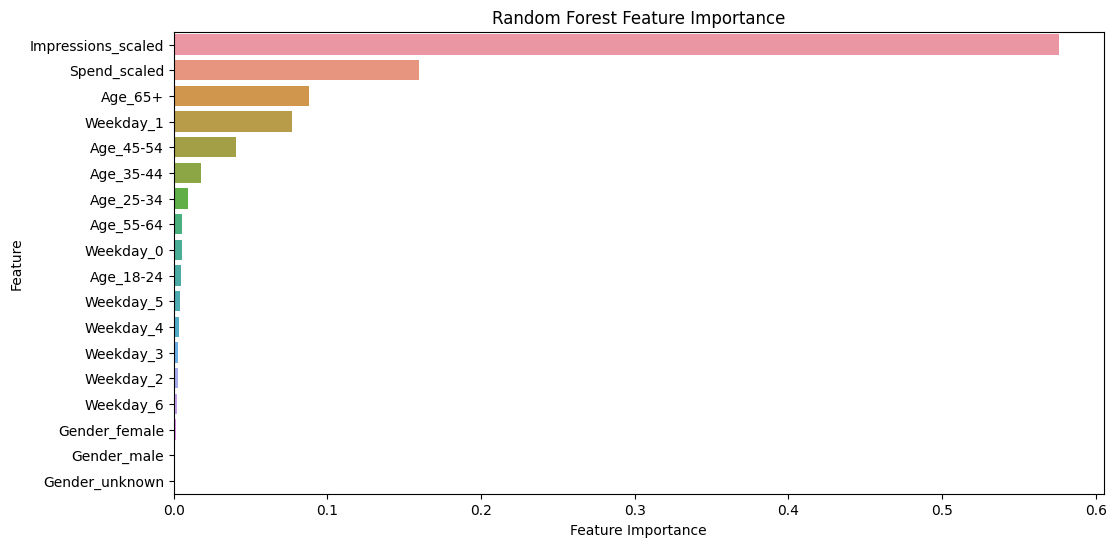

In [ ]:
# Assuming you have already trained your Random Forest model
# Load the feature names used during training
feature_names = features

# Get the feature importances from the trained model
feature_importance = model.feature_importances_

# Create a DataFrame to store the feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()






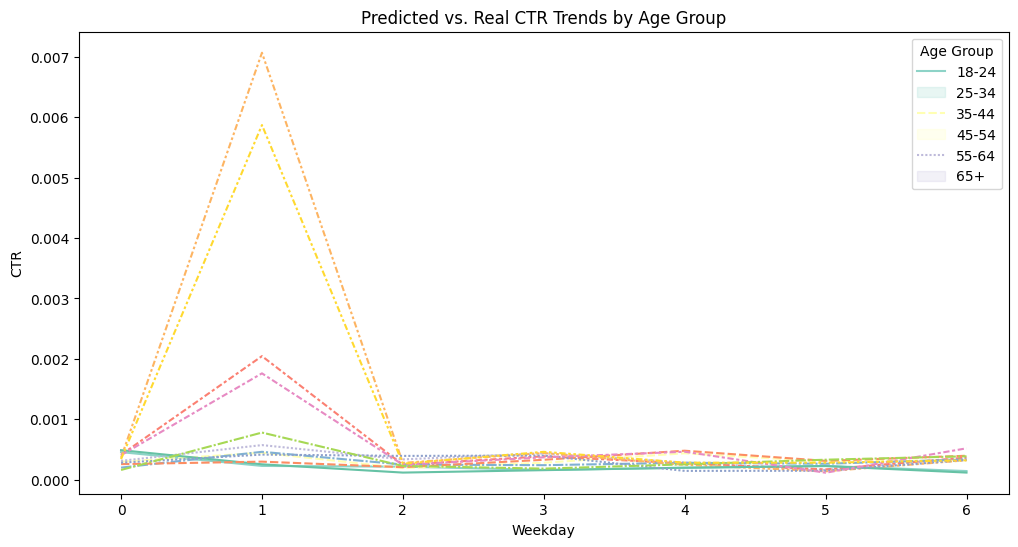

In [ ]:
# Group the data by 'Age' and 'Weekday' and calculate the mean predicted and real CTR for each combination
age_weekday_ctr = data_marbella.groupby(['Age', 'Weekday'])[['Predicted_CTR', 'CTR']].mean().reset_index()

# Pivot the data to prepare for visualization
pivot_age_weekday_ctr = age_weekday_ctr.pivot(index='Weekday', columns='Age', values=['Predicted_CTR', 'CTR'])


# Plotting the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=pivot_age_weekday_ctr['Predicted_CTR'], palette="Set3", linestyle="-")
sns.lineplot(data=pivot_age_weekday_ctr['CTR'], palette="Set2", linestyle='--')
plt.xlabel('Weekday')
plt.ylabel('CTR')
plt.title('Predicted vs. Real CTR Trends by Age Group')
plt.legend(title='Age Group', labels=pivot_age_weekday_ctr['Predicted_CTR'].columns)
plt.show()
#This code will create a line plot that shows the trends for predicted and real CTR values for each age group across the weekdays. The solid lines represent predicted CTR, and the dashed lines represent the real CTR.

#You can customize the visualization further by adjusting the colors, labels, or other plot attributes to suit your preferences and presentation requirements. This type of visualization can help you compare how well your model's predictions align with the real CTR values for different age groups and on different weekdays.


In [ ]:
age_groups_actualctr = data_marbella.groupby(["Age", "Weekday"])["CTR"].mean().reset_index()

In [ ]:
print(age_groups_actualctr)

      Age  Weekday       CTR
0   18-24        0  0.000488
1   18-24        1  0.000254
2   18-24        2  0.000117
3   18-24        3  0.000157
4   18-24        4  0.000198
5   18-24        5  0.000225
6   18-24        6  0.000117
7   25-34        0  0.000257
8   25-34        1  0.000298
9   25-34        2  0.000206
10  25-34        3  0.000329
11  25-34        4  0.000479
12  25-34        5  0.000312
13  25-34        6  0.000396
14  35-44        0  0.000281
15  35-44        1  0.000415
16  35-44        2  0.000393
17  35-44        3  0.000399
18  35-44        4  0.000145
19  35-44        5  0.000147
20  35-44        6  0.000326
21  45-54        0  0.000405
22  45-54        1  0.001760
23  45-54        2  0.000247
24  45-54        3  0.000369
25  45-54        4  0.000463
26  45-54        5  0.000115
27  45-54        6  0.000519
28  55-64        0  0.000161
29  55-64        1  0.000780
30  55-64        2  0.000227
31  55-64        3  0.000183
32  55-64        4  0.000254
33  55-64     